In [ ]:
# Only for Colab, comment out if not using Colab
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Change this line if you're using Colab to something like '/content/drive/MyDrive/TeamX/'
# where TeamX is just the clone of repository on your Google Drive
# and you have mounted the drive at /content/drive  
# See the Tutorial Slides for more detail. 

# Works on your local machine but not on Colab!
PROJECT_ROOT = '../..' 

# Fix this path and use this one on Colab
# PROJECT_ROOT = '/content/drive/MyDrive/TeamX' 

In [2]:
import sys
from os.path import join as ospj

sys.path.append(ospj(PROJECT_ROOT, 'src'))

%load_ext autoreload
%autoreload 2

In Exercise 3, you will implement a convolutional neural network to perform image classification and explore methods to improve the training performance and generalization of these networks.
We will use the CIFAR-10 dataset as a benchmark for our networks, similar to the previous exercise. This dataset consists of 50000 training images of 32x32 resolution with 10 object classes, namely airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. The task is to implement a convolutional network to classify these images using the PyTorch library. The four questions are,

- Implementing a convolutional neural network, training it, and visualizing its weights (Question 1).
- Experiment with batch normalization and early stopping (Question 2).
- Data augmentation and dropout to improve generalization (Question 3).
- Implement transfer learning from an ImageNet-pretrained model (Question 4).

### Question 1: Implement Convolutional Network (10 points)

In this question, we will implement a five-layered convolutional neural network architecture as well as the loss function to train it. Refer to the comments in the code to the exact places where you need to fill in the code.

![](../../data/exercise-3/fig1.png)

a) Our architecture is shown in Fig 1. It has five convolution blocks. Each block is consist of convolution, max pooling, and ReLU operation in that order. We will use 3×3 kernels in all convolutional layers. Set the padding and stride of the convolutional layers so that they maintain the spatial dimensions. Max pooling operations are done with 2×2 kernels, with a stride of 2, thereby halving the spatial resolution each time. Finally, stacking these five blocks leads to a 512 × 1 × 1 feature map. Classification is achieved by a fully connected layer. We will train convolutional neural networks on the CIFAR-10 dataset. Implement a class ConvNet to define the model described. The ConvNet takes 32 × 32 color images as inputs and has 5 hidden layers with 128, 512, 512, 512, 512 filters, and produces a 10-class classification. The code to train the model is already provided. Train the above model and report the training and validation accuracies. (5 points)

Please implement the above network (initialization and forward pass) in class `ConvNet` in `models/cnn/model.py`.

b) Implement the method `__str__` in `models/base_model.py`, which should give a string representaiton of the model. The string should show the number of `trainable` parameters for each layer. This gives us a measure of model capacity. Also at the end, the string contains the total number of trainable parameters for the entire model. (2 points)

![](../../data/exercise-3/fig2.png)

c) Implement a function `VisualizeFilter` in `models/cnn/model.py`, which visualizes the filters of the first convolution layer implemented in Q1.a. In other words, you need to show 128 filters with size 3x3 as color images (since each filter has three input channels). Stack these into 3x3 color images into one large image. You can use the `imshow` function from the `matplotlib` library to visualize the weights. See an example in Fig. 2 Compare the filters before and after training. Do you see any patterns? (3 points). Please attach your output images before and after training in a cell with your submission.

In [4]:
from torchvision import transforms

from utils.parse_config import ConfigParser
from trainers.cnn_trainer import CNNTrainer
import data_loaders.data_modules as module_data

from copy import deepcopy
%aimport -ConfigParser # Due to an issue of pickle and auto_reload

In [29]:
config = ConfigParser.wo_args(config='cfgs/exercise-3/cnn_cifar10.json', root_dir=PROJECT_ROOT)

datamodule = config.init_obj('data_module', module_data,
                             root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                            )

# Based on the heldout_split in the config file, 
# the datamodule will break the dataset into two splits
train_data_loader = datamodule.get_loader()
valid_data_loader = datamodule.get_heldout_loader()

# Test loader is the same as train loader
# except that training=False, shuffle=False, and no splitting is done 
# So we use the exact config from training and just modify these arguments
test_loader_args = deepcopy(config['data_module']['args']) #copy the args
test_loader_args['training']=False
test_loader_args['shuffle']=False
test_loader_args['heldout_split']=0.0

# Now we initialize the test module with the modified config
test_module = getattr(module_data, config['data_module']['type'])(root_dir=PROJECT_ROOT, **test_loader_args)
# And get the loader from it
test_loader = test_module.get_loader()

transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
transformations for split eval are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 10000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.5.weight | Trainable Parameters: 589824
Layer: layers.5.bias | Trainable Parameters: 512
Layer: layers.10.weight | Trainable Parameters: 2359296
Layer: layers.10.bias | Trainable Parameters: 512
Layer: layers.15.weight | Trainable Parameters: 2359296
Layer: layers.15.bias | Trainable Parameters: 512
Layer: layers.20.weight | Trainable Parameters: 2359296
Layer: layers.20.bias | Trainable Parameters: 512
Layer: fc_out.weight | Trainable Parameters: 5120
Layer: fc_out.bias | Trainable Parameters: 10
Total Trainable Parameters: 7678474


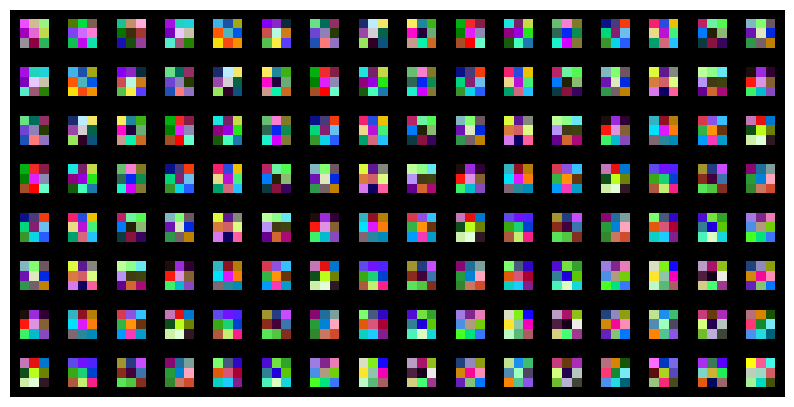

==> Start Training Epoch 1/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/10.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.7342754740185207
    top1           : 0.3467111111111111
    top5           : 0.8468444444444442
    eval_loss      : 1.4733907556533814
    eval_top1      : 0.45339999999999997
    eval_top5      : 0.9222000000000001
==> Start Training Epoch 2/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/10.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 1.2551342760192024
    top1           : 0.5430888888888886
    top5           : 0.9459333333333334
    eval_loss      : 1.069343011379242
    eval_top1      : 0.6148
    eval_top5      : 0.9646000000000002
==> Start Training Epoch 3/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/10.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 1.0488720422320896
    top1           : 0.625777777777778
    top5           : 0.9642000000000001
    eval_loss      : 0.9138332223892212
    eval_top1      : 0.6892
    eval_top5      : 0.9705999999999999
==> Start Training Epoch 4/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 4/10.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 0.9101300557454427
    top1           : 0.6784222222222223
    top5           : 0.9740000000000003
    eval_loss      : 0.8137289142608642
    eval_top1      : 0.7173999999999999
    eval_top5      : 0.9794000000000002
==> Start Training Epoch 5/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/10.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 0.8116735100746155
    top1           : 0.7123111111111111
    top5           : 0.9798888888888899
    eval_loss      : 0.7766003322601318
    eval_top1      : 0.7268000000000001
    eval_top5      : 0.9839999999999999
==> Start Training Epoch 6/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/10.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 6. Saving Model.....
    epoch          : 6
    loss           : 0.7062768650054931
    top1           : 0.7490888888888888
    top5           : 0.9855777777777791
    eval_loss      : 0.7291157150268555
    eval_top1      : 0.7456000000000002
    eval_top5      : 0.9813999999999997
==> Start Training Epoch 7/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/10.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 7. Saving Model.....
    epoch          : 7
    loss           : 0.6531723821163178
    top1           : 0.769333333333334
    top5           : 0.9881777777777796
    eval_loss      : 0.7115058612823486
    eval_top1      : 0.7568000000000003
    eval_top5      : 0.9821999999999999
==> Start Training Epoch 8/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/10.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 8. Saving Model.....
    epoch          : 8
    loss           : 0.5930176034238603
    top1           : 0.7906888888888886
    top5           : 0.9904888888888915
    eval_loss      : 0.6954547262191773
    eval_top1      : 0.767
    eval_top5      : 0.9841999999999999
==> Start Training Epoch 9/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/10.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
    epoch          : 9
    loss           : 0.5564482163058387
    top1           : 0.8019333333333335
    top5           : 0.9921555555555577
    eval_loss      : 0.6917025375366211
    eval_top1      : 0.7642
    eval_top5      : 0.9859999999999997
==> Start Training Epoch 10/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/10.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 10. Saving Model.....
    epoch          : 10
    loss           : 0.5083820941713121
    top1           : 0.8194000000000002
    top5           : 0.9939111111111131
    eval_loss      : 0.6879985988140106
    eval_top1      : 0.7715999999999998
    eval_top5      : 0.9853999999999999
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/E10_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/last_model.pth ...
Checkpoint saved.


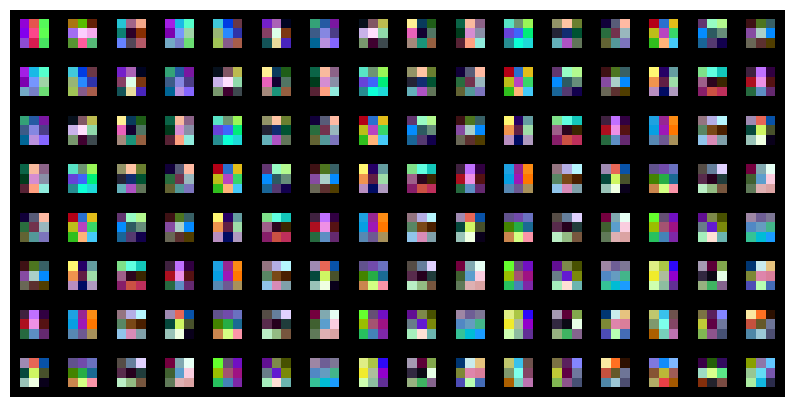

In [30]:
trainer_cnn = CNNTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)

trainer_cnn.model.VisualizeFilter()
trainer_cnn.train()
trainer_cnn.model.VisualizeFilter()

In [32]:
checkpoint_dir = '0604_151414' 
path = ospj(PROJECT_ROOT, f'saved/models/CIFAR10_CNN/{checkpoint_dir}/last_model.pth')

trainer_cnn.load_model(path=path)

result = trainer_cnn.evaluate(loader=test_loader)

print(result)

Loading checkpoint: ../../saved/models/CIFAR10_CNN/0604_151414/last_model.pth ...
Checkpoint loaded.
++> Evaluate at epoch 10 ...


  0% 0/10000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
{'loss': 0.7182060062885285, 'top1': 0.7611, 'top5': 0.9838999999999999}


#### Wirte your report for Q1 in this cell.

#### Question 1a: 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
train_loss = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_1/run-0603_115823-tag-loss_train.csv")
val_loss = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_1/run-0603_115823-tag-loss_valid.csv")
train_top1 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_1/run-0603_115823-tag-top1_train.csv")
val_top1 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_1/run-0603_115823-tag-top1_valid.csv")

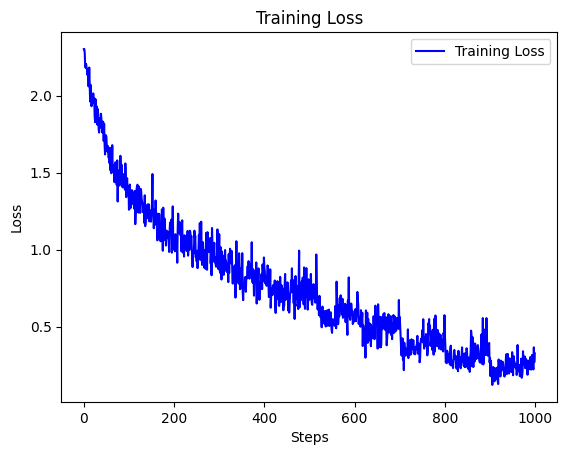

In [24]:
plt.plot(train_loss['Value'], 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

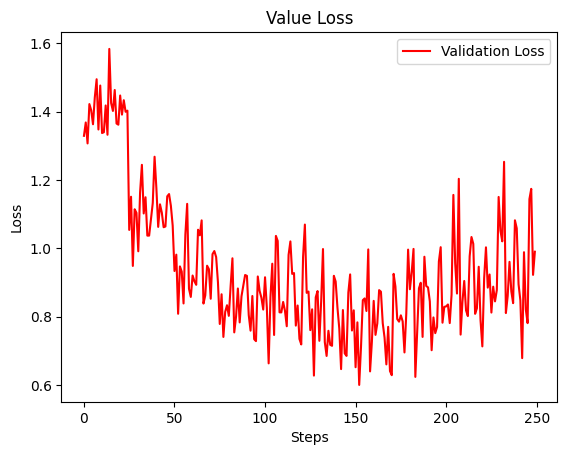

In [25]:
plt.plot(val_loss['Value'], 'r', label='Validation Loss')
plt.title('Value Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

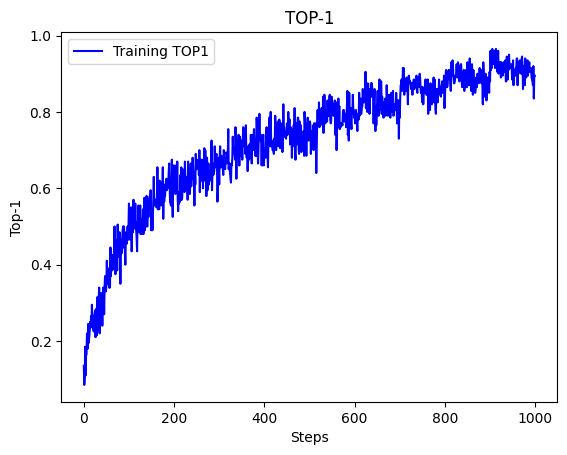

In [28]:
plt.plot(train_top1['Value'], 'b', label='Training TOP1')
plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

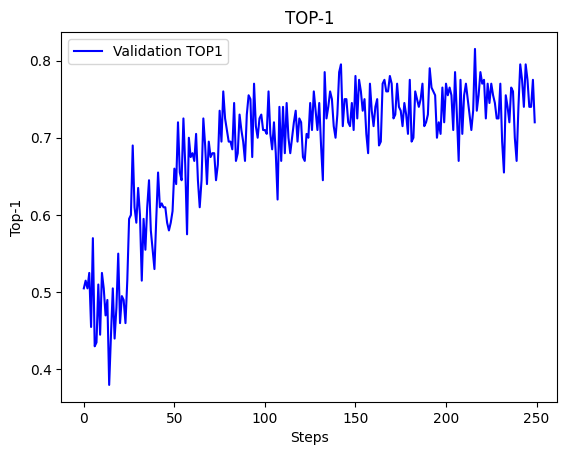

In [29]:
plt.plot(val_top1['Value'], 'b', label='Validation TOP1')
plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

#### Question 1b: 

In [9]:
print(trainer_cnn.model.__str__())

Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.4.weight | Trainable Parameters: 589824
Layer: layers.4.bias | Trainable Parameters: 512
Layer: layers.8.weight | Trainable Parameters: 2359296
Layer: layers.8.bias | Trainable Parameters: 512
Layer: layers.12.weight | Trainable Parameters: 2359296
Layer: layers.12.bias | Trainable Parameters: 512
Layer: layers.16.weight | Trainable Parameters: 2359296
Layer: layers.16.bias | Trainable Parameters: 512
Layer: fc_out.weight | Trainable Parameters: 5120
Layer: fc_out.bias | Trainable Parameters: 10
Total Trainable Parameters: 7678474


#### Question 1c: 

Before Traning: 
![](../../data/exercise-3/filter_visualize_before.png)
After Training: 
![](../../data/exercise-3/filter_visualize_after.png)



- Before Training the all the weights in Convolution layer one are intialized randomly. 
- After Training, the weights start to learn different filters. 
- Usually these initial layers in the CNNs learn low-level feature detection. These can be:
    - Edge Detection
    - Corner detection
    - High Pass/Low Pass Filter etc. 
- From the figure, we can clearly see, initially before the training the filters are random and all of them are looks similar. After training, the model learns to detect low level features. After training, we can see they are not random.   

### Question 2: Improve training of Convolutional Networks (15 points)

a) Batch normalization is a widely used operation in neural networks, which will increase the speed of convergence and reach higher performance. You can read the paper “Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift” for more theoretical details.
In practice, these operations are implemented in most toolboxes, such as PyTorch and TensorFlow. Add batch normalization in the model of Q1.a (You can use PyTorch's implementation). Please keep other hyperparameters the same, but only add batch normalization. The ConvNet with batch normalization still uses the same class with Q1.a but different arguments. Check the code for details. In each block, the computations are in the order of convolution, batch normalization, pooling, and ReLU. Compare the loss curves and accuracy using batch normalization to its counterpart in Q1.a. (5 points)

- Train the model with Batch Norm

In [17]:
config = ConfigParser.wo_args(config='cfgs/exercise-3/cnn_cifar10 (2a).json', root_dir=PROJECT_ROOT)
datamodule = config.init_obj('data_module', module_data,
                             root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                            )

# Based on the heldout_split in the config file, 
# the datamodule will break the dataset into two splits
train_data_loader = datamodule.get_loader()
valid_data_loader = datamodule.get_heldout_loader()

# Test loader is the same as train loader
# except that training=False, shuffle=False, and no splitting is done 
# So we use the exact config from training and just modify these arguments
test_loader_args = deepcopy(config['data_module']['args']) #copy the args
test_loader_args['training']=False
test_loader_args['shuffle']=False
test_loader_args['heldout_split']=0.0

# Now we initialize the test module with the modified config
test_module = getattr(module_data, config['data_module']['type'])(root_dir=PROJECT_ROOT, **test_loader_args)
# And get the loader from it
test_loader = test_module.get_loader()

transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
transformations for split eval are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 10000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


In [18]:
trainer_cnn = CNNTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)
trainer_cnn.train()

Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.1.weight | Trainable Parameters: 128
Layer: layers.1.bias | Trainable Parameters: 128
Layer: layers.4.weight | Trainable Parameters: 589824
Layer: layers.4.bias | Trainable Parameters: 512
Layer: layers.5.weight | Trainable Parameters: 512
Layer: layers.5.bias | Trainable Parameters: 512
Layer: layers.8.weight | Trainable Parameters: 2359296
Layer: layers.8.bias | Trainable Parameters: 512
Layer: layers.9.weight | Trainable Parameters: 512
Layer: layers.9.bias | Trainable Parameters: 512
Layer: layers.12.weight | Trainable Parameters: 2359296
Layer: layers.12.bias | Trainable Parameters: 512
Layer: layers.13.weight | Trainable Parameters: 512
Layer: layers.13.bias | Trainable Parameters: 512
Layer: layers.16.weight | Trainable Parameters: 2359296
Layer: layers.16.bias | Trainable Parameters: 512
Layer: layers.17.weight | Trainable Parameters: 512
Layer: layers.17.bias | Tr

Train Epoch: 1 Loss: 0.817044: : 100% 45000/45000 [00:08<00:00, 5408.69it/s]

==> Finished Epoch 1/10.
1
1
++> Evaluate at epoch 1 ...



Eval Loss: 1.073225: : 100% 5000/5000 [00:02<00:00, 2338.04it/s]

++> Evaluate epoch 1 Finished.
    epoch          : 1
    loss           : 1.276909391615126
    top1           : 0.5334444444444444
    top5           : 0.9379111111111111
    eval_loss      : 1.0306874537467956
    eval_top1      : 0.6308
    eval_top5      : 0.9656
==> Start Training Epoch 2/10, lr=0.002000 



Train Epoch: 2 Loss: 0.879774: : 100% 45000/45000 [00:08<00:00, 5425.60it/s]

==> Finished Epoch 2/10.
1
1
++> Evaluate at epoch 2 ...



Eval Loss: 0.804513: : 100% 5000/5000 [00:02<00:00, 2385.95it/s]

++> Evaluate epoch 2 Finished.
    epoch          : 2
    loss           : 0.8012839563687643
    top1           : 0.7175777777777774
    top5           : 0.9806666666666682
    eval_loss      : 0.8486578607559204
    eval_top1      : 0.7091999999999998
    eval_top5      : 0.9773999999999999
==> Start Training Epoch 3/10, lr=0.002000 



Train Epoch: 3 Loss: 0.573470: : 100% 45000/45000 [00:08<00:00, 5392.60it/s]

==> Finished Epoch 3/10.
1
1
++> Evaluate at epoch 3 ...



Eval Loss: 0.787657: : 100% 5000/5000 [00:02<00:00, 2338.18it/s]

++> Evaluate epoch 3 Finished.
    epoch          : 3
    loss           : 0.6129031332333883
    top1           : 0.7853999999999995
    top5           : 0.9885111111111126
    eval_loss      : 0.7908751606941223
    eval_top1      : 0.7322
    eval_top5      : 0.9827999999999999
==> Start Training Epoch 4/10, lr=0.002000 



Train Epoch: 4 Loss: 0.338304: : 100% 45000/45000 [00:08<00:00, 5357.78it/s]

==> Finished Epoch 4/10.
1
1
++> Evaluate at epoch 4 ...



Eval Loss: 0.708285: : 100% 5000/5000 [00:02<00:00, 2396.66it/s]

++> Evaluate epoch 4 Finished.
    epoch          : 4
    loss           : 0.47325009518199496
    top1           : 0.8350444444444444
    top5           : 0.9930222222222241
    eval_loss      : 0.6840252315998078
    eval_top1      : 0.7691999999999999
    eval_top5      : 0.9849999999999995
==> Start Training Epoch 5/10, lr=0.002000 



Train Epoch: 5 Loss: 0.364693: : 100% 45000/45000 [00:08<00:00, 5336.44it/s]

==> Finished Epoch 5/10.
1
1
++> Evaluate at epoch 5 ...



Eval Loss: 0.562935: : 100% 5000/5000 [00:02<00:00, 2331.76it/s]

++> Evaluate epoch 5 Finished.
    epoch          : 5
    loss           : 0.34983706884913973
    top1           : 0.877022222222223
    top5           : 0.9963111111111128
    eval_loss      : 0.6058595836162567
    eval_top1      : 0.7981999999999999
    eval_top5      : 0.9889999999999997
==> Start Training Epoch 6/10, lr=0.001600 



Train Epoch: 6 Loss: 0.236181: : 100% 45000/45000 [00:08<00:00, 5306.05it/s]

==> Finished Epoch 6/10.
1
1
++> Evaluate at epoch 6 ...



Eval Loss: 0.609516: : 100% 5000/5000 [00:02<00:00, 2408.26it/s]

++> Evaluate epoch 6 Finished.
    epoch          : 6
    loss           : 0.19907602243953282
    top1           : 0.930955555555556
    top5           : 0.9989555555555564
    eval_loss      : 0.6706491088867188
    eval_top1      : 0.7956000000000002
    eval_top5      : 0.9898
==> Start Training Epoch 7/10, lr=0.001600 



Train Epoch: 7 Loss: 0.173700: : 100% 45000/45000 [00:08<00:00, 5220.19it/s]

==> Finished Epoch 7/10.
1
1
++> Evaluate at epoch 7 ...



Eval Loss: 0.703208: : 100% 5000/5000 [00:02<00:00, 2366.91it/s]

++> Evaluate epoch 7 Finished.
    epoch          : 7
    loss           : 0.12725455903344685
    top1           : 0.9565111111111119
    top5           : 0.9997555555555557
    eval_loss      : 0.8925388932228089
    eval_top1      : 0.7796
    eval_top5      : 0.9819999999999999
==> Start Training Epoch 8/10, lr=0.001600 



Train Epoch: 8 Loss: 0.124618: : 100% 45000/45000 [00:08<00:00, 5275.05it/s]

==> Finished Epoch 8/10.
1
1
++> Evaluate at epoch 8 ...



Eval Loss: 0.612183: : 100% 5000/5000 [00:02<00:00, 2346.62it/s]

++> Evaluate epoch 8 Finished.
    epoch          : 8


    loss           : 0.09405830262435808
    top1           : 0.9672000000000002
    top5           : 0.9998666666666668
    eval_loss      : 0.7359085416793824
    eval_top1      : 0.8090000000000002
    eval_top5      : 0.9882
==> Start Training Epoch 9/10, lr=0.001600 


Train Epoch: 9 Loss: 0.128005: : 100% 45000/45000 [00:08<00:00, 5237.52it/s]

==> Finished Epoch 9/10.
1
1
++> Evaluate at epoch 9 ...



Eval Loss: 0.731103: : 100% 5000/5000 [00:02<00:00, 2364.16it/s]

++> Evaluate epoch 9 Finished.
    epoch          : 9
    loss           : 0.08256694787078434
    top1           : 0.9714222222222221
    top5           : 0.9999555555555556
    eval_loss      : 0.8502752208709716
    eval_top1      : 0.7972000000000001
    eval_top5      : 0.9896
==> Start Training Epoch 10/10, lr=0.001600 



Train Epoch: 10 Loss: 0.152389: : 100% 45000/45000 [00:08<00:00, 5169.66it/s]

==> Finished Epoch 10/10.
1
1
++> Evaluate at epoch 10 ...



Eval Loss: 1.015926: : 100% 5000/5000 [00:02<00:00, 2349.89it/s]

++> Evaluate epoch 10 Finished.
    epoch          : 10
    loss           : 0.06983053656087981
    top1           : 0.9760000000000005
    top5           : 0.9999333333333333
    eval_loss      : 1.056376121044159
    eval_top1      : 0.7912000000000002
    eval_top5      : 0.9845999999999998
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_132653/E10_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_132653/last_model.pth ...
Checkpoint saved.


Wirte your report for Q2.a in this cell. Feel free to add extra code cells

#### Comparing Curves for question 1a and 2a

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
train_loss_1 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_1/run-0603_115823-tag-loss_train.csv")
val_loss_1 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_1/run-0603_115823-tag-loss_valid.csv")
train_top1_1 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_1/run-0603_115823-tag-top1_train.csv")
val_top1_1 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_1/run-0603_115823-tag-top1_valid.csv")

train_loss_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/1/run-0603_132653-tag-loss_train.csv")
val_loss_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/1/run-0603_132653-tag-loss_valid.csv")
train_top1_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/1/run-0603_132653-tag-top1_train.csv")
val_top1_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/1/run-0603_132653-tag-top1_valid.csv")

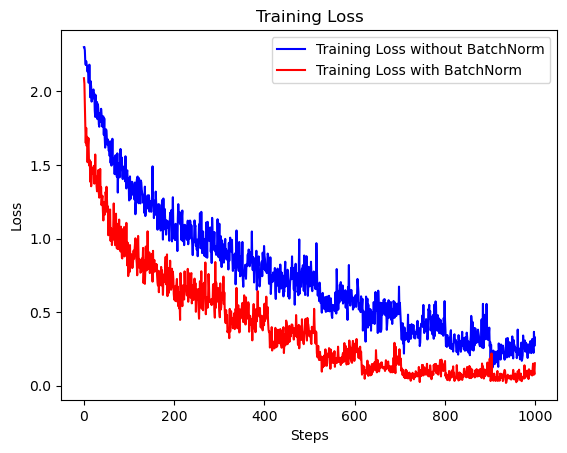

In [20]:
plt.plot(train_loss_1['Value'], 'b', label='Training Loss without BatchNorm')
plt.plot(train_loss_2['Value'], 'r', label='Training Loss with BatchNorm')

plt.title('Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

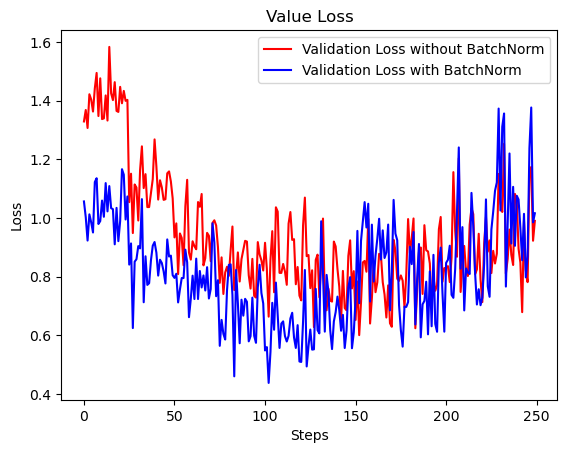

In [21]:
plt.plot(val_loss_1['Value'], 'r', label='Validation Loss without BatchNorm')
plt.plot(val_loss_2['Value'], 'b', label='Validation Loss with BatchNorm')

plt.title('Value Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

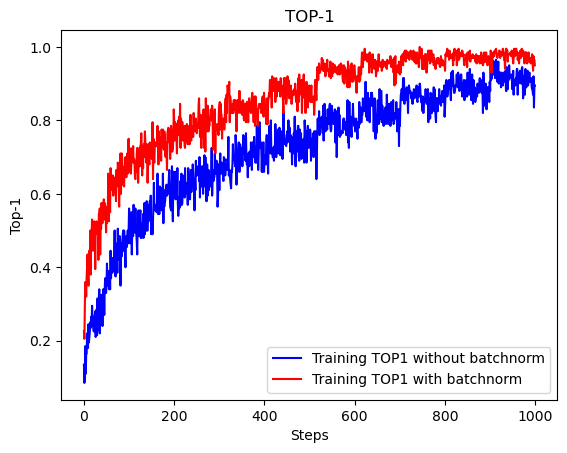

In [24]:
plt.plot(train_top1_1['Value'], 'b', label='Training TOP1 without batchnorm')
plt.plot(train_top1_2['Value'], 'r', label='Training TOP1 with batchnorm')

plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

- BatchNorm also provide regularization effects. 

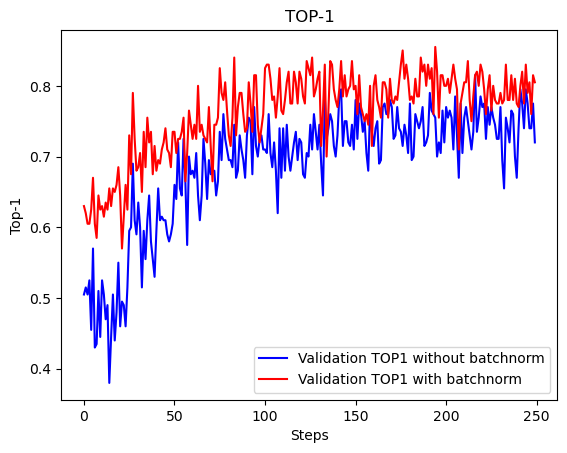

In [26]:
plt.plot(val_top1_1['Value'], 'b', label='Validation TOP1 without batchnorm')
plt.plot(val_top1_2['Value'], 'r', label='Validation TOP1 with batchnorm')

plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

- From the above plot it is clear that using batchnorm, helps in faster convergence. #LongLive-BatchNorm

b) Throughout training, we optimize our parameters on the training set. This does not guarantee that with ever step we also improve on validation and test set as well! Hence, there is no reason for our latest training checkpoint (the last checkpoint after the last epoch) to be the best to keep. One simple idea is to save a checkpoint of the best model for the validation set throughout the training. Meanining that as the training proceeds, we keep checking our accuracy after each epoch (or every N epochs) and save the best model. This can mitigate overfitting, as if the model overfits to training data (and accuracy on validation set drops), we would still have access to the best model checkpoint! Note that you should not do this on the test set, as we are not alowed to optimize **anything** (including the checkpoint selection) on the test set.

For this task, you need add the logic for saving the `best model` during the training. In the `src/trainers/base_trainer`, in method `train()` we have already have the call to `self.evaluate()`. All you need to add is to process the returned result (a dictionary of metric_key -> metric_value) and see if you should save a checkpoint of the model. If yes, then you can save a checkpoint at `self.checkpoint_dir` under `best_val_model.pth` or a similar name, using the `save_model()` method. Feel free to define additional class attributes or methods if needed.
We also recommend adding a few prints, such as the epochs that you save the best model at.

Increase the training epochs to 50 in Q1.a and Q2.a, and compare the **best model** and **latest model** on the **training set** and **validation set**. Due to the randomness, you can train multiple times to verify and observe overfitting and early stopping. (5 points)
Feel free to add any needed train/evaluation code below for this task.

You can also add extra code to `base_trainer.py` so that it returns extra information after the training is finished. For example, in assignment 2's `models/twolayernet/model.py` we had a train method that would return the history of loss values, and then in the notebook the history was plotted. Feel free to make adjustments that let you better understand what's happening. This also applies to next questions. Right now the code only uses tensorboard and wandb for plotting (if enabled in config). 

Wirte your report for Q2.b in this cell. Feel free to add extra code cells

<br>
<br>
<br>

### The following cells are the solution of question 2b. 
- In experiment 1 we increase the number of epochs to 50 in the config file as of question 1a. 
- Similar thing was done for the Experiment 2 but for the config file defined in 2a. 

The other common differnce is that we are only saving the best model based on maximization of eval_top_1. 

#### Experiment 1: 
Q1(a); increasing epochs to 50

In [4]:
config = ConfigParser.wo_args(config='cfgs/exercise-3/cnn_cifar10 (2b_1) .json', root_dir=PROJECT_ROOT)
datamodule = config.init_obj('data_module', module_data,
                             root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                            )

# Based on the heldout_split in the config file, 
# the datamodule will break the dataset into two splits
train_data_loader = datamodule.get_loader()
valid_data_loader = datamodule.get_heldout_loader()

# Test loader is the same as train loader
# except that training=False, shuffle=False, and no splitting is done 
# So we use the exact config from training and just modify these arguments
test_loader_args = deepcopy(config['data_module']['args']) #copy the args
test_loader_args['training']=False
test_loader_args['shuffle']=False
test_loader_args['heldout_split']=0.0

# Now we initialize the test module with the modified config
test_module = getattr(module_data, config['data_module']['type'])(root_dir=PROJECT_ROOT, **test_loader_args)
# And get the loader from it
test_loader = test_module.get_loader()

transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
transformations for split eval are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 10000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


In [7]:
trainer_cnn = CNNTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)
trainer_cnn.train()

Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.4.weight | Trainable Parameters: 589824
Layer: layers.4.bias | Trainable Parameters: 512
Layer: layers.8.weight | Trainable Parameters: 2359296
Layer: layers.8.bias | Trainable Parameters: 512
Layer: layers.12.weight | Trainable Parameters: 2359296
Layer: layers.12.bias | Trainable Parameters: 512
Layer: layers.16.weight | Trainable Parameters: 2359296
Layer: layers.16.bias | Trainable Parameters: 512
Layer: fc_out.weight | Trainable Parameters: 5120
Layer: fc_out.bias | Trainable Parameters: 10
Total Trainable Parameters: 7678474
==> Start Training Epoch 1/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/50.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.8108548498153687
    top1           : 0.31115555555555563
    top5           : 0.8218000000000005
    eval_loss      : 1.449597544670105
    eval_top1      : 0.45779999999999993
    eval_top5      : 0.9298000000000003
==> Start Training Epoch 2/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/50.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 1.3016796016693115
    top1           : 0.521466666666667
    top5           : 0.9396666666666669
    eval_loss      : 1.1969076871871949
    eval_top1      : 0.5716
    eval_top5      : 0.9542
==> Start Training Epoch 3/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/50.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 1.0900462592972648
    top1           : 0.6067555555555557
    top5           : 0.9597777777777774
    eval_loss      : 1.062833387851715
    eval_top1      : 0.6227999999999999
    eval_top5      : 0.965
==> Start Training Epoch 4/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 4/50.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 0.9437761484252082
    top1           : 0.6632222222222219
    top5           : 0.9703555555555555
    eval_loss      : 0.9285817337036133
    eval_top1      : 0.6764
    eval_top5      : 0.9740000000000001
==> Start Training Epoch 5/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/50.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 0.8338842717806498
    top1           : 0.7052888888888889
    top5           : 0.9778666666666675
    eval_loss      : 0.8444608807563782
    eval_top1      : 0.7082
    eval_top5      : 0.9773999999999998
==> Start Training Epoch 6/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/50.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 6. Saving Model.....
    epoch          : 6
    loss           : 0.7232197218471104
    top1           : 0.7454666666666668
    top5           : 0.9835333333333339
    eval_loss      : 0.7860595035552979
    eval_top1      : 0.7275999999999999
    eval_top5      : 0.9796
==> Start Training Epoch 7/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/50.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 7. Saving Model.....
    epoch          : 7
    loss           : 0.6507001349661086
    top1           : 0.7717999999999997
    top5           : 0.9867111111111124
    eval_loss      : 0.7613752675056458
    eval_top1      : 0.7382
    eval_top5      : 0.9820000000000002
==> Start Training Epoch 8/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/50.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 8. Saving Model.....
    epoch          : 8
    loss           : 0.5914124540487925
    top1           : 0.7906222222222224
    top5           : 0.9894222222222241
    eval_loss      : 0.7757643914222717
    eval_top1      : 0.7452000000000001
    eval_top5      : 0.9815999999999999
==> Start Training Epoch 9/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/50.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
    epoch          : 9
    loss           : 0.534037720627255
    top1           : 0.8114444444444444
    top5           : 0.9924888888888908
    eval_loss      : 0.7942041897773743
    eval_top1      : 0.7355999999999999
    eval_top5      : 0.978
==> Start Training Epoch 10/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/50.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
    epoch          : 10
    loss           : 0.4752812459733751
    top1           : 0.8296222222222223
    top5           : 0.9942222222222248
    eval_loss      : 0.7811555242538453
    eval_top1      : 0.7440000000000002
    eval_top5      : 0.9848
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/E10_model.pth ...
Checkpoint saved.
==> Start Training Epoch 11/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 11/50.
1
1
++> Evaluate at epoch 11 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 11 Finished.
    epoch          : 11
    loss           : 0.3818556214703454
    top1           : 0.8634666666666669
    top5           : 0.996244444444446
    eval_loss      : 0.825262520313263
    eval_top1      : 0.7440000000000001
    eval_top5      : 0.9808
==> Start Training Epoch 12/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 12/50.
1
1
++> Evaluate at epoch 12 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 12 Finished.
    epoch          : 12
    loss           : 0.32102381964524584
    top1           : 0.8876222222222222
    top5           : 0.9975555555555567
    eval_loss      : 0.8642382049560546
    eval_top1      : 0.7404
    eval_top5      : 0.983
==> Start Training Epoch 13/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 13/50.
1
1
++> Evaluate at epoch 13 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 13 Finished.
    epoch          : 13
    loss           : 0.2770865486065547
    top1           : 0.9010888888888889
    top5           : 0.9986888888888896
    eval_loss      : 0.9769829273223877
    eval_top1      : 0.7374
    eval_top5      : 0.9805999999999999
==> Start Training Epoch 14/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 14/50.
1
1
++> Evaluate at epoch 14 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 14 Finished.
    epoch          : 14
    loss           : 0.23631990955935583
    top1           : 0.9141777777777782
    top5           : 0.9990000000000006
    eval_loss      : 0.9739164686203003
    eval_top1      : 0.741
    eval_top5      : 0.9793999999999998
==> Start Training Epoch 15/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 15/50.
1
1
++> Evaluate at epoch 15 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 15 Finished.
    epoch          : 15
    loss           : 0.18452304128143523
    top1           : 0.9362444444444447
    top5           : 0.9994000000000003
    eval_loss      : 1.0852606201171875
    eval_top1      : 0.7404
    eval_top5      : 0.9811999999999999
==> Start Training Epoch 16/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 16/50.
1
1
++> Evaluate at epoch 16 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 16 Finished.
    epoch          : 16
    loss           : 0.12163637994064225
    top1           : 0.9583555555555556
    top5           : 0.999777777777778
    eval_loss      : 1.2304519391059876
    eval_top1      : 0.7332
    eval_top5      : 0.9799999999999999
==> Start Training Epoch 17/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 17/50.
1
1
++> Evaluate at epoch 17 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 17 Finished.
    epoch          : 17
    loss           : 0.08293214031391674
    top1           : 0.9726222222222224
    top5           : 0.9998444444444445
    eval_loss      : 1.3135339331626892
    eval_top1      : 0.7438000000000001
    eval_top5      : 0.9819999999999998
==> Start Training Epoch 18/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 18/50.
1
1
++> Evaluate at epoch 18 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 18 Finished.
    epoch          : 18
    loss           : 0.05883301686081621
    top1           : 0.9812222222222228
    top5           : 0.9999777777777777
    eval_loss      : 1.512494158744812
    eval_top1      : 0.7419999999999998
    eval_top5      : 0.98
==> Start Training Epoch 19/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 19/50.
1
1
++> Evaluate at epoch 19 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 19 Finished.
    epoch          : 19
    loss           : 0.0733057808627685
    top1           : 0.9750000000000008
    top5           : 0.9999777777777777
    eval_loss      : 1.536142339706421
    eval_top1      : 0.7372
    eval_top5      : 0.9768000000000001
==> Start Training Epoch 20/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 20/50.
1
1
++> Evaluate at epoch 20 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 20 Finished.
    epoch          : 20
    loss           : 0.06649125137262875
    top1           : 0.9777333333333338
    top5           : 0.9999777777777777
    eval_loss      : 1.5844252729415893
    eval_top1      : 0.7368000000000001
    eval_top5      : 0.9769999999999999
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/E20_model.pth ...
Checkpoint saved.
==> Start Training Epoch 21/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 21/50.
1
1
++> Evaluate at epoch 21 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 21 Finished.
    epoch          : 21
    loss           : 0.03499029528349638
    top1           : 0.9901555555555576
    top5           : 1.0
    eval_loss      : 1.7122587728500367
    eval_top1      : 0.7437999999999999
    eval_top5      : 0.9792000000000001
==> Start Training Epoch 22/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 22/50.
1
1
++> Evaluate at epoch 22 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 22 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 22. Saving Model.....
    epoch          : 22
    loss           : 0.011635865620854828
    top1           : 0.9979777777777791
    top5           : 1.0
    eval_loss      : 1.833207516670227
    eval_top1      : 0.7464000000000002
    eval_top5      : 0.9795999999999998
==> Start Training Epoch 23/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 23/50.
1
1
++> Evaluate at epoch 23 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 23 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 23. Saving Model.....
    epoch          : 23
    loss           : 0.008502653697505594
    top1           : 0.9987777777777784
    top5           : 1.0
    eval_loss      : 1.9460785293579101
    eval_top1      : 0.7465999999999999
    eval_top5      : 0.9784
==> Start Training Epoch 24/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 24/50.
1
1
++> Evaluate at epoch 24 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 24 Finished.
    epoch          : 24
    loss           : 0.007227998567331168
    top1           : 0.9987555555555564
    top5           : 1.0
    eval_loss      : 2.0421501064300536
    eval_top1      : 0.7464
    eval_top5      : 0.9790000000000001
==> Start Training Epoch 25/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 25/50.
1
1
++> Evaluate at epoch 25 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 25 Finished.
    epoch          : 25
    loss           : 0.06662751290740239
    top1           : 0.9767555555555554
    top5           : 0.9999555555555556
    eval_loss      : 1.7268535232543945
    eval_top1      : 0.7342
    eval_top5      : 0.9733999999999999
==> Start Training Epoch 26/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 26/50.
1
1
++> Evaluate at epoch 26 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 26 Finished.
    epoch          : 26
    loss           : 0.03766482808937629
    top1           : 0.9877333333333352
    top5           : 1.0
    eval_loss      : 1.8328878450393677
    eval_top1      : 0.7414000000000001
    eval_top5      : 0.9789999999999999
==> Start Training Epoch 27/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 27/50.
1
1
++> Evaluate at epoch 27 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 27 Finished.
    epoch          : 27
    loss           : 0.009828346489618223
    top1           : 0.9979555555555564
    top5           : 1.0
    eval_loss      : 1.9919411325454712
    eval_top1      : 0.7436
    eval_top5      : 0.9786000000000001
==> Start Training Epoch 28/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 28/50.
1
1
++> Evaluate at epoch 28 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 28 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 28. Saving Model.....
    epoch          : 28
    loss           : 0.0026632462904995513
    top1           : 0.9999555555555556
    top5           : 1.0
    eval_loss      : 2.0354953241348266
    eval_top1      : 0.7472
    eval_top5      : 0.9798
==> Start Training Epoch 29/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 29/50.
1
1
++> Evaluate at epoch 29 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 29 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 29. Saving Model.....
    epoch          : 29
    loss           : 0.0009744484555105575
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.1183486938476563
    eval_top1      : 0.7522
    eval_top5      : 0.9797999999999999
==> Start Training Epoch 30/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 30/50.
1
1
++> Evaluate at epoch 30 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 30 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 30. Saving Model.....
    epoch          : 30
    loss           : 0.0006353476047257168
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.178709177970886
    eval_top1      : 0.7529999999999998
    eval_top5      : 0.9808000000000001
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/E30_model.pth ...
Checkpoint saved.
==> Start Training Epoch 31/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 31/50.
1
1
++> Evaluate at epoch 31 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 31 Finished.
    epoch          : 31
    loss           : 0.0005021924422019058
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.2199623012542724
    eval_top1      : 0.7528
    eval_top5      : 0.9804
==> Start Training Epoch 32/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 32/50.
1
1
++> Evaluate at epoch 32 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 32 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 32. Saving Model.....
    epoch          : 32
    loss           : 0.0004264917552548771
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.267127733230591
    eval_top1      : 0.7536000000000002
    eval_top5      : 0.981
==> Start Training Epoch 33/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 33/50.
1
1
++> Evaluate at epoch 33 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 33 Finished.
    epoch          : 33
    loss           : 0.0003748888528207317
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.3004528427124025
    eval_top1      : 0.753
    eval_top5      : 0.981
==> Start Training Epoch 34/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 34/50.
1
1
++> Evaluate at epoch 34 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 34 Finished.
    epoch          : 34
    loss           : 0.00033205460912237567
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.32230655670166
    eval_top1      : 0.7534000000000001
    eval_top5      : 0.9803999999999999
==> Start Training Epoch 35/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 35/50.
1
1
++> Evaluate at epoch 35 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 35 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 35. Saving Model.....
    epoch          : 35
    loss           : 0.00029980920339261905
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.3423582792282103
    eval_top1      : 0.7572000000000001
    eval_top5      : 0.981
==> Start Training Epoch 36/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 36/50.
1
1
++> Evaluate at epoch 36 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 36 Finished.
    epoch          : 36
    loss           : 0.00026926399105125
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.3782075548172
    eval_top1      : 0.7548
    eval_top5      : 0.981
==> Start Training Epoch 37/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 37/50.
1
1
++> Evaluate at epoch 37 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 37 Finished.
    epoch          : 37
    loss           : 0.0002515461602403472
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.3899610328674314
    eval_top1      : 0.7537999999999998
    eval_top5      : 0.9807999999999999
==> Start Training Epoch 38/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 38/50.
1
1
++> Evaluate at epoch 38 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 38 Finished.
    epoch          : 38
    loss           : 0.00023506193441183616
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.397915868759155
    eval_top1      : 0.7548
    eval_top5      : 0.9807999999999999
==> Start Training Epoch 39/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 39/50.
1
1
++> Evaluate at epoch 39 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 39 Finished.
    epoch          : 39
    loss           : 0.00022135036835809136
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.409285821914673
    eval_top1      : 0.7545999999999998
    eval_top5      : 0.9811999999999999
==> Start Training Epoch 40/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 40/50.
1
1
++> Evaluate at epoch 40 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 40 Finished.
    epoch          : 40
    loss           : 0.00020874553143383109
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.4259098958969116
    eval_top1      : 0.7549999999999999
    eval_top5      : 0.9808
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/E40_model.pth ...
Checkpoint saved.
==> Start Training Epoch 41/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 41/50.
1
1
++> Evaluate at epoch 41 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 41 Finished.
    epoch          : 41
    loss           : 0.00019420566761659252
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.442721757888794
    eval_top1      : 0.7547999999999999
    eval_top5      : 0.9807999999999999
==> Start Training Epoch 42/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 42/50.
1
1
++> Evaluate at epoch 42 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 42 Finished.
    epoch          : 42
    loss           : 0.0001871430573131268
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.450870699882507
    eval_top1      : 0.7558000000000001
    eval_top5      : 0.981
==> Start Training Epoch 43/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 43/50.
1
1
++> Evaluate at epoch 43 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 43 Finished.
    epoch          : 43
    loss           : 0.0001793975490404086
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.4715228843688966
    eval_top1      : 0.7566000000000002
    eval_top5      : 0.9811999999999999
==> Start Training Epoch 44/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 44/50.
1
1
++> Evaluate at epoch 44 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 44 Finished.
    epoch          : 44
    loss           : 0.0001738785310751862
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.474358682632446
    eval_top1      : 0.7558
    eval_top5      : 0.9811999999999999
==> Start Training Epoch 45/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 45/50.
1
1
++> Evaluate at epoch 45 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 45 Finished.
    epoch          : 45
    loss           : 0.00016780599576628042
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.49145348072052
    eval_top1      : 0.7560000000000001
    eval_top5      : 0.9805999999999999
==> Start Training Epoch 46/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 46/50.
1
1
++> Evaluate at epoch 46 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 46 Finished.
    epoch          : 46
    loss           : 0.00016066248347568844
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.491993799209595
    eval_top1      : 0.7556
    eval_top5      : 0.9808
==> Start Training Epoch 47/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 47/50.
1
1
++> Evaluate at epoch 47 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 47 Finished.
    epoch          : 47
    loss           : 0.000156699162390497
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.49524893283844
    eval_top1      : 0.7572
    eval_top5      : 0.9802000000000001
==> Start Training Epoch 48/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 48/50.
1
1
++> Evaluate at epoch 48 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 48 Finished.
    epoch          : 48
    loss           : 0.0001540782024514758
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.5034796476364134
    eval_top1      : 0.7558
    eval_top5      : 0.9809999999999998
==> Start Training Epoch 49/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 49/50.
1
1
++> Evaluate at epoch 49 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 49 Finished.
    epoch          : 49
    loss           : 0.00015268761742239198
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.514321928024292
    eval_top1      : 0.7559999999999998
    eval_top5      : 0.9808
==> Start Training Epoch 50/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 50/50.
1
1
++> Evaluate at epoch 50 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 50 Finished.
    epoch          : 50
    loss           : 0.00015146047536594172
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 2.5134486055374143
    eval_top1      : 0.7545999999999999
    eval_top5      : 0.9808000000000001
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/E50_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_184136/last_model.pth ...
Checkpoint saved.


##### Val-loss curve for experiment 1

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
train_loss_1 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_1/run-0603_140011-tag-loss_train.csv")
val_loss_1 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_1/run-0603_140011-tag-loss_valid.csv")
train_top1_1 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_1/run-0603_140011-tag-top1_train.csv")
val_top1_1 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_1/run-0603_140011-tag-top1_valid.csv")

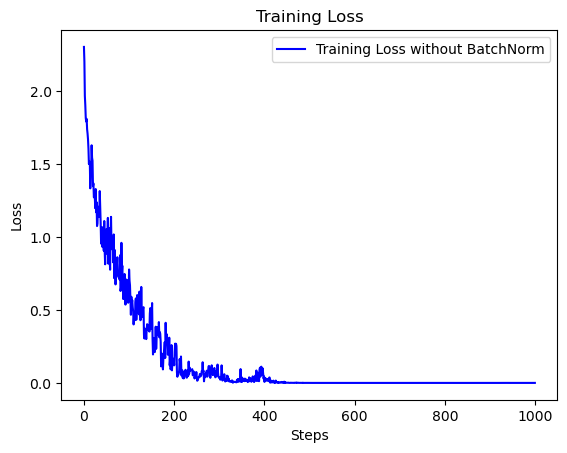

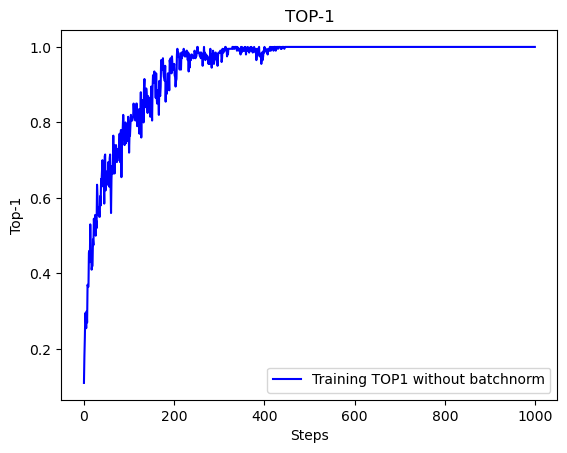

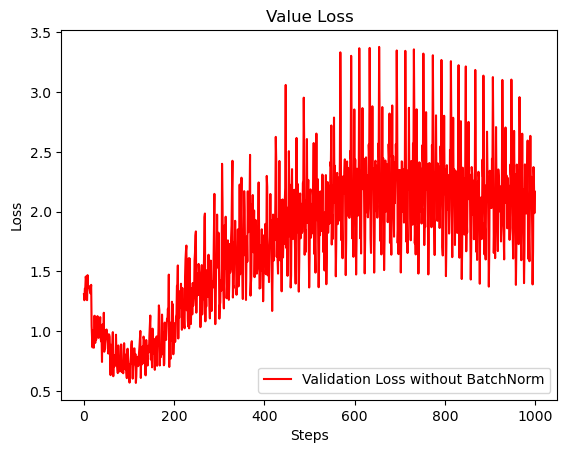

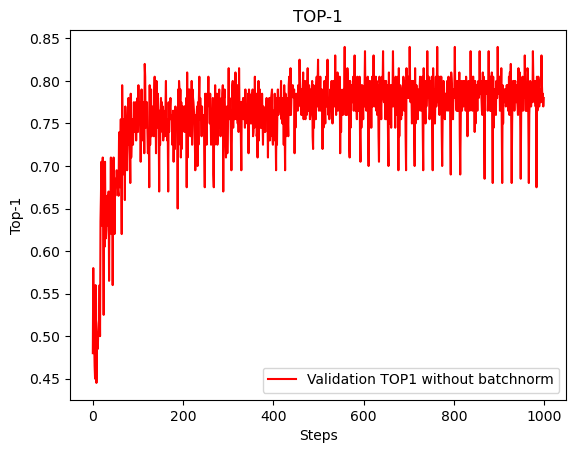

In [30]:
plt.plot(train_loss_1['Value'], 'b', label='Training Loss without BatchNorm')
plt.title('Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_top1_1['Value'], 'b', label='Training TOP1 without batchnorm')
plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

plt.plot(val_loss_1['Value'], 'r', label='Validation Loss without BatchNorm')
plt.title('Value Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(val_top1_1['Value'], 'r', label='Validation TOP1 without batchnorm')
plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

#### Observations Experiment 1: 
- As we can see in the training loss, It converges to zero.
- On the contrary, the validation loss first decreases and then increases.
--> **This is the sign on overfitting.**
- Validation loss has become constant and slowly decreasing, if we increase the epochs, it may be clear. 

#### Experiment 2: 
Q2(a); increasing epochs to 50

In [9]:
config = ConfigParser.wo_args(config='cfgs/exercise-3/cnn_cifar10 (2b_2) .json', root_dir=PROJECT_ROOT)
datamodule = config.init_obj('data_module', module_data,
                             root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                            )

# Based on the heldout_split in the config file, 
# the datamodule will break the dataset into two splits
train_data_loader = datamodule.get_loader()
valid_data_loader = datamodule.get_heldout_loader()

# Test loader is the same as train loader
# except that training=False, shuffle=False, and no splitting is done 
# So we use the exact config from training and just modify these arguments
test_loader_args = deepcopy(config['data_module']['args']) #copy the args
test_loader_args['training']=False
test_loader_args['shuffle']=False
test_loader_args['heldout_split']=0.0

# Now we initialize the test module with the modified config
test_module = getattr(module_data, config['data_module']['type'])(root_dir=PROJECT_ROOT, **test_loader_args)
# And get the loader from it
test_loader = test_module.get_loader()



transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
transformations for split eval are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 10000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


In [10]:
trainer_cnn = CNNTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)
trainer_cnn.train()

Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.1.weight | Trainable Parameters: 128
Layer: layers.1.bias | Trainable Parameters: 128
Layer: layers.4.weight | Trainable Parameters: 589824
Layer: layers.4.bias | Trainable Parameters: 512
Layer: layers.5.weight | Trainable Parameters: 512
Layer: layers.5.bias | Trainable Parameters: 512
Layer: layers.8.weight | Trainable Parameters: 2359296
Layer: layers.8.bias | Trainable Parameters: 512
Layer: layers.9.weight | Trainable Parameters: 512
Layer: layers.9.bias | Trainable Parameters: 512
Layer: layers.12.weight | Trainable Parameters: 2359296
Layer: layers.12.bias | Trainable Parameters: 512
Layer: layers.13.weight | Trainable Parameters: 512
Layer: layers.13.bias | Trainable Parameters: 512
Layer: layers.16.weight | Trainable Parameters: 2359296
Layer: layers.16.bias | Trainable Parameters: 512
Layer: layers.17.weight | Trainable Parameters: 512
Layer: layers.17.bias | Tr

  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/50.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.2579743149545457
    top1           : 0.5399999999999997
    top5           : 0.9369333333333335
    eval_loss      : 0.9764524483680725
    eval_top1      : 0.6544000000000001
    eval_top5      : 0.9693999999999997
==> Start Training Epoch 2/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/50.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 0.7933787743250529
    top1           : 0.7201111111111111
    top5           : 0.9808888888888895
    eval_loss      : 0.7750171947479249
    eval_top1      : 0.721
    eval_top5      : 0.9841999999999997
==> Start Training Epoch 3/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/50.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 0.6055610948138767
    top1           : 0.7876222222222231
    top5           : 0.9890000000000022
    eval_loss      : 0.6427025103569031
    eval_top1      : 0.7781999999999999
    eval_top5      : 0.9853999999999999
==> Start Training Epoch 4/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

Train Epoch: 2 Loss: 1.279644: :  89% 40000/45000 [19:44<02:28, 33.77it/s]  
Train Epoch: 2 Loss: 1.279644: :  89% 40000/45000 [19:44<02:28, 33.77it/s]  
Train Epoch: 2 Loss: 1.279644: :  89% 40000/45000 [19:44<02:28, 33.77it/s]  
Train Epoch: 2 Loss: 1.279644: :  89% 40000/45000 [19:44<02:28, 33.77it/s]  
Train Epoch: 2 Loss: 1.279644: :  89% 40000/45000 [19:44<02:28, 33.77it/s]  

Train Epoch: 2 Loss: 1.279644: :  89% 40000/45000 [19:44<02:28, 33.77it/s]  


==> Finished Epoch 4/50.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 0.48132274481985304
    top1           : 0.8318666666666666
    top5           : 0.9932444444444466
    eval_loss      : 0.6707522535324096
    eval_top1      : 0.7807999999999999
    eval_top5      : 0.9874
==> Start Training Epoch 5/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/50.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 0.34519571483135225
    top1           : 0.8802222222222222
    top5           : 0.9965111111111127
    eval_loss      : 0.6028898668289184
    eval_top1      : 0.8058000000000001
    eval_top5      : 0.9881999999999997
==> Start Training Epoch 6/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/50.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
    epoch          : 6
    loss           : 0.1932224687602785
    top1           : 0.9335111111111107
    top5           : 0.998733333333334
    eval_loss      : 0.7333311271667481
    eval_top1      : 0.7864000000000001
    eval_top5      : 0.9881999999999997
==> Start Training Epoch 7/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/50.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 7. Saving Model.....
    epoch          : 7
    loss           : 0.12758610602882173
    top1           : 0.9561555555555556
    top5           : 0.9996666666666669
    eval_loss      : 0.7008223176002503
    eval_top1      : 0.8131999999999998
    eval_top5      : 0.9876
==> Start Training Epoch 8/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/50.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
    epoch          : 8
    loss           : 0.08791383675403065
    top1           : 0.969466666666667
    top5           : 0.9999333333333333
    eval_loss      : 0.8416907763481141
    eval_top1      : 0.7894000000000001
    eval_top5      : 0.9882
==> Start Training Epoch 9/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/50.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 9. Saving Model.....
    epoch          : 9
    loss           : 0.08079904965228504
    top1           : 0.9718222222222223
    top5           : 0.9999777777777777
    eval_loss      : 0.7710065567493438
    eval_top1      : 0.823
    eval_top5      : 0.9919999999999999
==> Start Training Epoch 10/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/50.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
    epoch          : 10
    loss           : 0.07239790979358884
    top1           : 0.9744666666666671
    top5           : 0.9999333333333333
    eval_loss      : 0.9343488597869873
    eval_top1      : 0.7888
    eval_top5      : 0.9892
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/E10_model.pth ...
Checkpoint saved.
==> Start Training Epoch 11/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 11/50.
1
1
++> Evaluate at epoch 11 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 11 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 11. Saving Model.....
    epoch          : 11
    loss           : 0.032845362135105666
    top1           : 0.9888666666666683
    top5           : 1.0
    eval_loss      : 0.7702157521247863
    eval_top1      : 0.8367999999999998
    eval_top5      : 0.9902
==> Start Training Epoch 12/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 12/50.
1
1
++> Evaluate at epoch 12 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 12 Finished.
    epoch          : 12
    loss           : 0.015773324331061708
    top1           : 0.9951333333333352
    top5           : 1.0
    eval_loss      : 0.8454020023345947
    eval_top1      : 0.8265999999999998
    eval_top5      : 0.9905999999999997
==> Start Training Epoch 13/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 13/50.
1
1
++> Evaluate at epoch 13 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 13 Finished.
    epoch          : 13
    loss           : 0.02739299057568941
    top1           : 0.9904888888888904
    top5           : 1.0
    eval_loss      : 1.0194272708892822
    eval_top1      : 0.8033999999999999
    eval_top5      : 0.987
==> Start Training Epoch 14/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 14/50.
1
1
++> Evaluate at epoch 14 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 14 Finished.
    epoch          : 14
    loss           : 0.0513567170749108
    top1           : 0.981533333333334
    top5           : 0.9999777777777777
    eval_loss      : 0.8794090867042541
    eval_top1      : 0.8124000000000002
    eval_top5      : 0.9847999999999999
==> Start Training Epoch 15/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 15/50.
1
1
++> Evaluate at epoch 15 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 15 Finished.
    epoch          : 15
    loss           : 0.04451072679625617
    top1           : 0.9852222222222234
    top5           : 1.0
    eval_loss      : 1.1445177721977233
    eval_top1      : 0.7831999999999999
    eval_top5      : 0.9847999999999999
==> Start Training Epoch 16/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 16/50.
1
1
++> Evaluate at epoch 16 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 16 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 16. Saving Model.....
    epoch          : 16
    loss           : 0.018929477839523718
    top1           : 0.9939777777777788
    top5           : 1.0
    eval_loss      : 0.8411276638507843
    eval_top1      : 0.8402000000000001
    eval_top5      : 0.9919999999999999
==> Start Training Epoch 17/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 17/50.
1
1
++> Evaluate at epoch 17 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 17 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 17. Saving Model.....
    epoch          : 17
    loss           : 0.0044085713195252335
    top1           : 0.998844444444445
    top5           : 1.0
    eval_loss      : 0.824765214920044
    eval_top1      : 0.8464
    eval_top5      : 0.9924
==> Start Training Epoch 18/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 18/50.
1
1
++> Evaluate at epoch 18 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 18 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 18. Saving Model.....
    epoch          : 18
    loss           : 0.0018783330423886783
    top1           : 0.9996222222222224
    top5           : 1.0
    eval_loss      : 0.8334006309509278
    eval_top1      : 0.8503999999999998
    eval_top5      : 0.9904
==> Start Training Epoch 19/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 19/50.
1
1
++> Evaluate at epoch 19 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 19 Finished.
    epoch          : 19
    loss           : 0.0006953129421971324
    top1           : 0.9999111111111112
    top5           : 1.0
    eval_loss      : 0.8257260155677796
    eval_top1      : 0.8492000000000001
    eval_top5      : 0.9915999999999999
==> Start Training Epoch 20/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 20/50.
1
1
++> Evaluate at epoch 20 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 20 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 20. Saving Model.....
    epoch          : 20
    loss           : 0.00020558838439885423
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8230799508094787
    eval_top1      : 0.8545999999999999
    eval_top5      : 0.9922
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/E20_model.pth ...
Checkpoint saved.
==> Start Training Epoch 21/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 21/50.
1
1
++> Evaluate at epoch 21 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 21 Finished.
    epoch          : 21
    loss           : 0.00011152110675336897
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8188307452201843
    eval_top1      : 0.8540000000000001
    eval_top5      : 0.9922
==> Start Training Epoch 22/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 22/50.
1
1
++> Evaluate at epoch 22 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 22 Finished.
    epoch          : 22
    loss           : 0.00010716836234981504
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8309169769287109
    eval_top1      : 0.8532
    eval_top5      : 0.9912000000000001
==> Start Training Epoch 23/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 23/50.
1
1
++> Evaluate at epoch 23 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 23 Finished.
    epoch          : 23
    loss           : 8.787021268896449e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8305670356750489
    eval_top1      : 0.8538000000000002
    eval_top5      : 0.992
==> Start Training Epoch 24/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 24/50.
1
1
++> Evaluate at epoch 24 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 24 Finished.
    epoch          : 24
    loss           : 8.138248331508496e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.839745147228241
    eval_top1      : 0.8542000000000002
    eval_top5      : 0.9917999999999999
==> Start Training Epoch 25/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 25/50.
1
1
++> Evaluate at epoch 25 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 25 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 25. Saving Model.....
    epoch          : 25
    loss           : 7.76895348826656e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8454483771324157
    eval_top1      : 0.8547999999999999
    eval_top5      : 0.9915999999999999
==> Start Training Epoch 26/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 26/50.
1
1
++> Evaluate at epoch 26 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 26 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 26. Saving Model.....
    epoch          : 26
    loss           : 7.079049282765482e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8465188384056092
    eval_top1      : 0.8552000000000001
    eval_top5      : 0.9918
==> Start Training Epoch 27/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 27/50.
1
1
++> Evaluate at epoch 27 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 27 Finished.
    epoch          : 27
    loss           : 6.457556287285924e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8513214898109436
    eval_top1      : 0.855
    eval_top5      : 0.9912000000000001
==> Start Training Epoch 28/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 28/50.
1
1
++> Evaluate at epoch 28 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 28 Finished.
    epoch          : 28
    loss           : 6.729733601484137e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8610979032516479
    eval_top1      : 0.8517999999999999
    eval_top5      : 0.9912000000000002
==> Start Training Epoch 29/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 29/50.
1
1
++> Evaluate at epoch 29 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 29 Finished.
    epoch          : 29
    loss           : 5.887926928052265e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8700827598571778
    eval_top1      : 0.8519999999999998
    eval_top5      : 0.9914000000000001
==> Start Training Epoch 30/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 30/50.
1
1
++> Evaluate at epoch 30 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 30 Finished.
    epoch          : 30
    loss           : 5.030649690727134e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8709073352813721
    eval_top1      : 0.8522
    eval_top5      : 0.9914000000000002
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/E30_model.pth ...
Checkpoint saved.
==> Start Training Epoch 31/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 31/50.
1
1
++> Evaluate at epoch 31 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 31 Finished.
    epoch          : 31
    loss           : 7.110172893994281e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8853761839866638
    eval_top1      : 0.8483999999999999
    eval_top5      : 0.9908000000000001
==> Start Training Epoch 32/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 32/50.
1
1
++> Evaluate at epoch 32 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 32 Finished.
    epoch          : 32
    loss           : 6.696408958911585e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8842756843566895
    eval_top1      : 0.8514
    eval_top5      : 0.9904
==> Start Training Epoch 33/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 33/50.
1
1
++> Evaluate at epoch 33 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 33 Finished.
    epoch          : 33
    loss           : 0.16738759495903247
    top1           : 0.9426666666666671
    top5           : 0.9988888888888893
    eval_loss      : 0.7139896035194397
    eval_top1      : 0.8186
    eval_top5      : 0.9893999999999998
==> Start Training Epoch 34/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 34/50.
1
1
++> Evaluate at epoch 34 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 34 Finished.
    epoch          : 34
    loss           : 0.05642793698029386
    top1           : 0.9805333333333346
    top5           : 0.9999111111111112
    eval_loss      : 0.7584812235832215
    eval_top1      : 0.8286
    eval_top5      : 0.9894
==> Start Training Epoch 35/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 35/50.
1
1
++> Evaluate at epoch 35 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 35 Finished.
    epoch          : 35
    loss           : 0.010308289940779407
    top1           : 0.9976444444444451
    top5           : 1.0
    eval_loss      : 0.7455645632743836
    eval_top1      : 0.8438
    eval_top5      : 0.9898
==> Start Training Epoch 36/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 36/50.
1
1
++> Evaluate at epoch 36 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 36 Finished.
    epoch          : 36
    loss           : 0.0019224484295894703
    top1           : 0.9998444444444444
    top5           : 1.0
    eval_loss      : 0.7147756004333496
    eval_top1      : 0.8539999999999999
    eval_top5      : 0.9924
==> Start Training Epoch 37/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 37/50.
1
1
++> Evaluate at epoch 37 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 37 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 37. Saving Model.....
    epoch          : 37
    loss           : 0.0005580498120333585
    top1           : 0.9999777777777777
    top5           : 1.0
    eval_loss      : 0.7370436811447143
    eval_top1      : 0.8557999999999999
    eval_top5      : 0.9924
==> Start Training Epoch 38/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 38/50.
1
1
++> Evaluate at epoch 38 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 38 Finished.
    epoch          : 38
    loss           : 0.0002955837841081019
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.7440257048606873
    eval_top1      : 0.8548000000000002
    eval_top5      : 0.9926
==> Start Training Epoch 39/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 39/50.
1
1
++> Evaluate at epoch 39 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 39 Finished.
    epoch          : 39
    loss           : 0.0002196562294072161
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.756016925573349
    eval_top1      : 0.8554
    eval_top5      : 0.9928
==> Start Training Epoch 40/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 40/50.
1
1
++> Evaluate at epoch 40 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 40 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 40. Saving Model.....
    epoch          : 40
    loss           : 0.0001620669922784954
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.7607244849205017
    eval_top1      : 0.8560000000000001
    eval_top5      : 0.9924
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/E40_model.pth ...
Checkpoint saved.
==> Start Training Epoch 41/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 41/50.
1
1
++> Evaluate at epoch 41 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 41 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 41. Saving Model.....
    epoch          : 41
    loss           : 0.0001341821363085829
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.7747759473323822
    eval_top1      : 0.8565999999999999
    eval_top5      : 0.9926
==> Start Training Epoch 42/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 42/50.
1
1
++> Evaluate at epoch 42 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 42 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 42. Saving Model.....
    epoch          : 42
    loss           : 0.00011809924319903884
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.7806306326389313
    eval_top1      : 0.8572000000000002
    eval_top5      : 0.993
==> Start Training Epoch 43/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 43/50.
1
1
++> Evaluate at epoch 43 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 43 Finished.
    epoch          : 43
    loss           : 9.776652779287866e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.7870644164085389
    eval_top1      : 0.8560000000000002
    eval_top5      : 0.9928
==> Start Training Epoch 44/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 44/50.
1
1
++> Evaluate at epoch 44 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 44 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 44. Saving Model.....
    epoch          : 44
    loss           : 8.865020014733696e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8002450799942017
    eval_top1      : 0.8576000000000001
    eval_top5      : 0.9926
==> Start Training Epoch 45/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 45/50.
1
1
++> Evaluate at epoch 45 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 45 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 45. Saving Model.....
    epoch          : 45
    loss           : 7.691891844539593e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8027839159965515
    eval_top1      : 0.8584
    eval_top5      : 0.9928
==> Start Training Epoch 46/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 46/50.
1
1
++> Evaluate at epoch 46 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 46 Finished.
    epoch          : 46
    loss           : 7.475829017089887e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8109721910953521
    eval_top1      : 0.8565999999999999
    eval_top5      : 0.9919999999999999
==> Start Training Epoch 47/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 47/50.
1
1
++> Evaluate at epoch 47 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 47 Finished.
    epoch          : 47
    loss           : 6.999861791781668e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8140261745452881
    eval_top1      : 0.8578000000000001
    eval_top5      : 0.9922
==> Start Training Epoch 48/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 48/50.
1
1
++> Evaluate at epoch 48 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 48 Finished.
    epoch          : 48
    loss           : 5.90666159647905e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8220615935325623
    eval_top1      : 0.8564
    eval_top5      : 0.9926
==> Start Training Epoch 49/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 49/50.
1
1
++> Evaluate at epoch 49 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 49 Finished.
    epoch          : 49
    loss           : 5.587266602055428e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8293870568275452
    eval_top1      : 0.8563999999999998
    eval_top5      : 0.9918
==> Start Training Epoch 50/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 50/50.
1
1
++> Evaluate at epoch 50 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 50 Finished.
    epoch          : 50
    loss           : 4.841565467763252e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8350727975368499
    eval_top1      : 0.8560000000000001
    eval_top5      : 0.992
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/E50_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_190101/last_model.pth ...
Checkpoint saved.


##### Val-loss curve for experiment 2

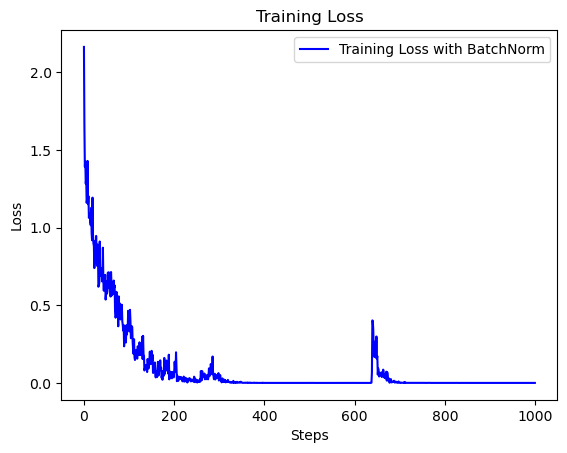

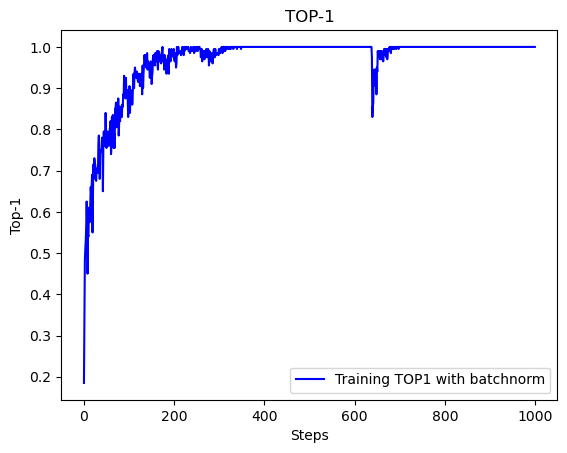

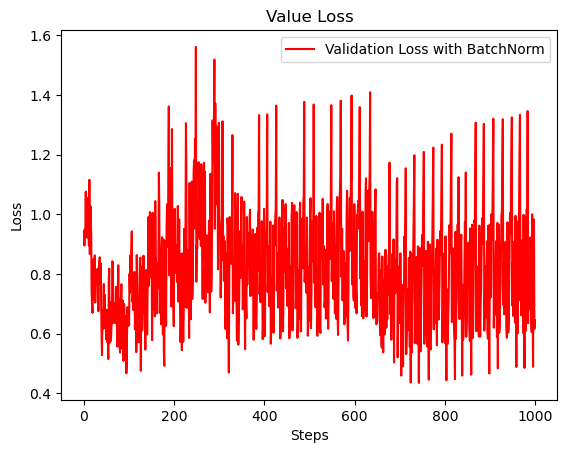

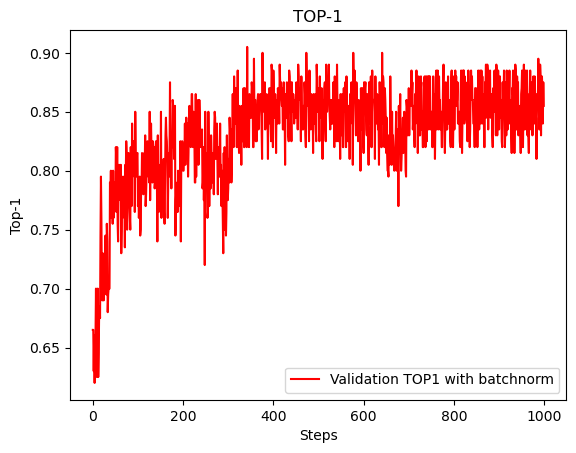

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
train_loss_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_2/run-0603_190101-tag-loss_train.csv")
val_loss_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_2/run-0603_190101-tag-loss_valid.csv")
train_top1_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_2/run-0603_190101-tag-top1_train.csv")
val_top1_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_2/run-0603_190101-tag-top1_valid.csv")

plt.plot(train_loss_2['Value'], 'b', label='Training Loss with BatchNorm')
plt.title('Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_top1_2['Value'], 'b', label='Training TOP1 with batchnorm')
plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

plt.plot(val_loss_2['Value'], 'r', label='Validation Loss with BatchNorm')
plt.title('Value Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(val_top1_2['Value'], 'r', label='Validation TOP1 with batchnorm')
plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

#### Comparision of Exp1 and Exp2

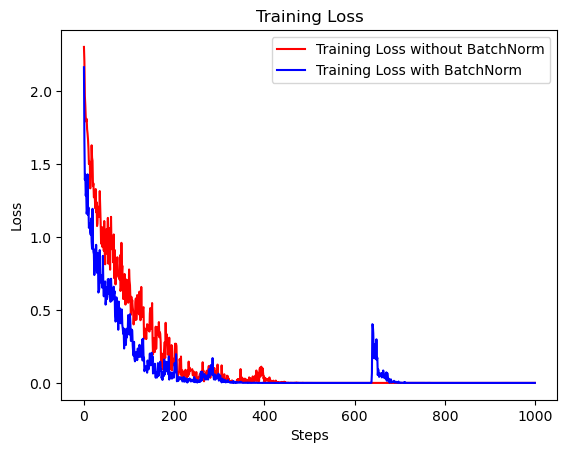

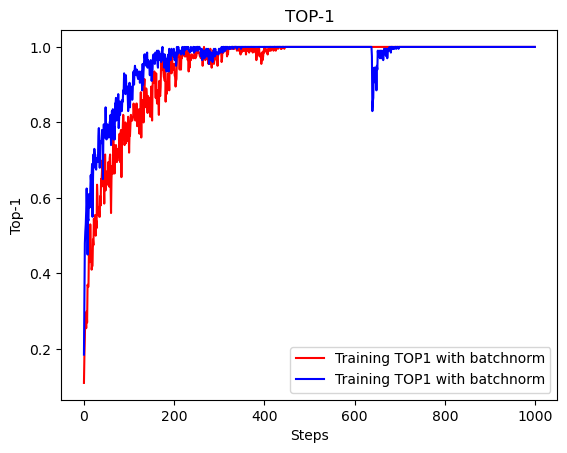

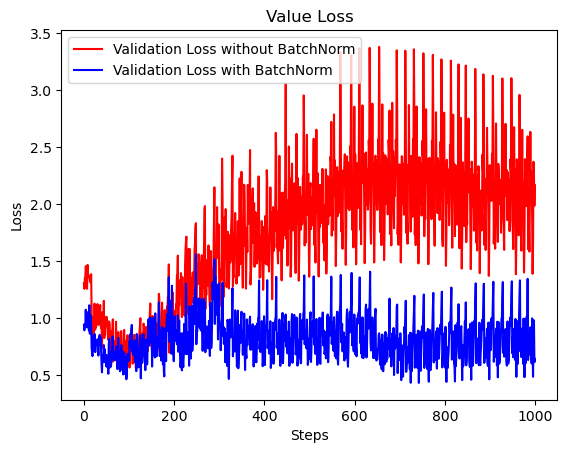

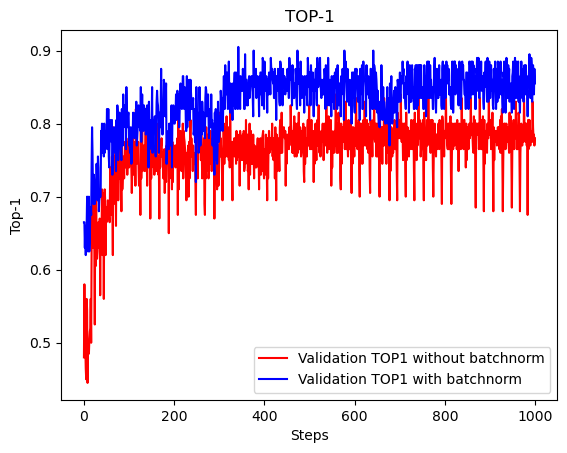

In [34]:
plt.plot(train_loss_1['Value'], 'r', label='Training Loss without BatchNorm')
plt.plot(train_loss_2['Value'], 'b', label='Training Loss with BatchNorm')
plt.title('Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_top1_1['Value'], 'r', label='Training TOP1 with batchnorm')
plt.plot(train_top1_2['Value'], 'b', label='Training TOP1 with batchnorm')
plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

plt.plot(val_loss_1['Value'], 'r', label='Validation Loss without BatchNorm')
plt.plot(val_loss_2['Value'], 'b', label='Validation Loss with BatchNorm')
plt.title('Value Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(val_top1_1['Value'], 'r', label='Validation TOP1 without batchnorm')
plt.plot(val_top1_2['Value'], 'b', label='Validation TOP1 with batchnorm')

plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

#### Observations Experiment 2: 
- As we can see in the training loss, It converges to zero with some anomaly. 
- On the contrary, the validation loss first decreases and then increases. However it is not as bad as experiment 1
--> **This is the sign on overfitting.**
- Validation loss has become constant. 

- As compared to experiment 1 it was less overfiting, maybe because we are using batchnorm. It is acting like a regularizer. 

Source: 
- [Regularization: Batch-normalization and Drop out](https://medium.com/analytics-vidhya/everything-you-need-to-know-about-regularizer-eb477b0c82ba)


c) While in part `b` we save the best model, we still do as many epochs as indicated in the config file. This is not convenient as the overfitting steps are wasting time and compute and also wouldn't affect the best model. Hence, Early Stopping can be helpful, where we **stop** the training after a few non-improving steps! Early stopping logic should be considered after every training epoch is finished, to see if we should do more epochs or not. Therefore, the logic should should be implemented in `train` method in `base_trainer.py` (which takes care of running multiple epochs). You need to implement it at the end of the loop over epochs.

Once implemented, you need to change the config file to enable early stopping. You can either modify `cfgs/exercise-3/cnn_cifar10.json` directly or simply create a copy at the same place under a different name and parse that config instead. Within the config file, modify the following "trainer" configs:
```JSON
{
    ...
    "trainer":{
        ...
        "monitor": "max eval_top1",
        "early_stop": 0 -> change to 4
    }
}
```
This will enable the early stopping to be considered for `eval_top1` metric and the maximum number of non-improving steps will be set to 4.

Re-run one of the experiments from part `b` that the best epoch was way lower than the total number of epochs, and see if early stopping can prevent unnecessary training epochs.

Wirte your report for Q2.c in this cell. Feel free to add extra code cells

<br>
<br>
<br>

#### Solution Q2.c

In this question we added a logic of stoping the process of training if the validation set top1_eval does not increase for 4 epochs.  

In [39]:
config = ConfigParser.wo_args(config='cfgs/exercise-3/cnn_cifar10 (2c) .json', root_dir=PROJECT_ROOT)
datamodule = config.init_obj('data_module', module_data,
                             root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                            )

# Based on the heldout_split in the config file, 
# the datamodule will break the dataset into two splits
train_data_loader = datamodule.get_loader()
valid_data_loader = datamodule.get_heldout_loader()

# Test loader is the same as train loader
# except that training=False, shuffle=False, and no splitting is done 
# So we use the exact config from training and just modify these arguments
test_loader_args = deepcopy(config['data_module']['args']) #copy the args
test_loader_args['training']=False
test_loader_args['shuffle']=False
test_loader_args['heldout_split']=0.0

# Now we initialize the test module with the modified config
test_module = getattr(module_data, config['data_module']['type'])(root_dir=PROJECT_ROOT, **test_loader_args)
# And get the loader from it
test_loader = test_module.get_loader()

transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
transformations for split eval are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 10000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


In [16]:
trainer_cnn = CNNTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)
trainer_cnn.train()

Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.1.weight | Trainable Parameters: 128
Layer: layers.1.bias | Trainable Parameters: 128
Layer: layers.4.weight | Trainable Parameters: 589824
Layer: layers.4.bias | Trainable Parameters: 512
Layer: layers.5.weight | Trainable Parameters: 512
Layer: layers.5.bias | Trainable Parameters: 512
Layer: layers.8.weight | Trainable Parameters: 2359296
Layer: layers.8.bias | Trainable Parameters: 512
Layer: layers.9.weight | Trainable Parameters: 512
Layer: layers.9.bias | Trainable Parameters: 512
Layer: layers.12.weight | Trainable Parameters: 2359296
Layer: layers.12.bias | Trainable Parameters: 512
Layer: layers.13.weight | Trainable Parameters: 512
Layer: layers.13.bias | Trainable Parameters: 512
Layer: layers.16.weight | Trainable Parameters: 2359296
Layer: layers.16.bias | Trainable Parameters: 512
Layer: layers.17.weight | Trainable Parameters: 512
Layer: layers.17.bias | Tr

  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/50.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.2758400037553574
    top1           : 0.5328444444444446
    top5           : 0.9359999999999998
    eval_loss      : 0.9924563145637513
    eval_top1      : 0.6509999999999999
    eval_top5      : 0.9703999999999999
==> Start Training Epoch 2/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/50.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
    epoch          : 2
    loss           : 0.8043779794375102
    top1           : 0.7169777777777778
    top5           : 0.9798444444444449
    eval_loss      : 1.0717648625373841
    eval_top1      : 0.6422
    eval_top5      : 0.9756
==> Start Training Epoch 3/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/50.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 0.6171605292956034
    top1           : 0.7816666666666665
    top5           : 0.9885111111111136
    eval_loss      : 0.700373432636261
    eval_top1      : 0.7582
    eval_top5      : 0.9861999999999999
==> Start Training Epoch 4/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 4/50.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
    epoch          : 4
    loss           : 0.47974976897239685
    top1           : 0.8321555555555562
    top5           : 0.9927555555555577
    eval_loss      : 0.7271456050872803
    eval_top1      : 0.755
    eval_top5      : 0.9807999999999997
==> Start Training Epoch 5/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/50.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 0.3578527998924255
    top1           : 0.8744666666666674
    top5           : 0.9961333333333351
    eval_loss      : 0.6061350405216217
    eval_top1      : 0.801
    eval_top5      : 0.9877999999999997
==> Start Training Epoch 6/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/50.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
    epoch          : 6
    loss           : 0.20905944476524987
    top1           : 0.9275777777777778
    top5           : 0.9987777777777787
    eval_loss      : 0.6713344025611877
    eval_top1      : 0.7997999999999998
    eval_top5      : 0.9877999999999999
==> Start Training Epoch 7/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/50.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
    epoch          : 7
    loss           : 0.13330509684152073
    top1           : 0.9543555555555552
    top5           : 0.9996444444444448
    eval_loss      : 0.7710467386245727
    eval_top1      : 0.7988000000000001
    eval_top5      : 0.9879999999999999
==> Start Training Epoch 8/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/50.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 8. Saving Model.....
    epoch          : 8
    loss           : 0.09208423285848565
    top1           : 0.9681777777777787
    top5           : 0.9999111111111112
    eval_loss      : 0.7049630725383759
    eval_top1      : 0.8119999999999998
    eval_top5      : 0.9891999999999997
==> Start Training Epoch 9/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/50.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
    epoch          : 9
    loss           : 0.08152393070360024
    top1           : 0.9717333333333331
    top5           : 0.9999777777777777
    eval_loss      : 0.9125883936882019
    eval_top1      : 0.8042000000000001
    eval_top5      : 0.9877999999999999
==> Start Training Epoch 10/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/50.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
    epoch          : 10
    loss           : 0.07674320125745403
    top1           : 0.9730222222222222
    top5           : 1.0
    eval_loss      : 0.8532589793205261
    eval_top1      : 0.8064000000000001
    eval_top5      : 0.9888000000000001
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/E10_model.pth ...
Checkpoint saved.
==> Start Training Epoch 11/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 11/50.
1
1
++> Evaluate at epoch 11 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 11 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 11. Saving Model.....
    epoch          : 11
    loss           : 0.03379601121776634
    top1           : 0.9887111111111132
    top5           : 1.0
    eval_loss      : 0.7354115986824036
    eval_top1      : 0.8358
    eval_top5      : 0.9913999999999998
==> Start Training Epoch 12/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 12/50.
1
1
++> Evaluate at epoch 12 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 12 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 12. Saving Model.....
    epoch          : 12
    loss           : 0.013001099952186148
    top1           : 0.9963555555555571
    top5           : 1.0
    eval_loss      : 0.7704332137107849
    eval_top1      : 0.8375999999999998
    eval_top5      : 0.9927999999999999
==> Start Training Epoch 13/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 13/50.
1
1
++> Evaluate at epoch 13 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 13 Finished.
    epoch          : 13
    loss           : 0.015090719822587239
    top1           : 0.9955111111111135
    top5           : 1.0
    eval_loss      : 0.898412926197052
    eval_top1      : 0.8211999999999999
    eval_top5      : 0.9882000000000004
==> Start Training Epoch 14/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 14/50.
1
1
++> Evaluate at epoch 14 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 14 Finished.
    epoch          : 14
    loss           : 0.05302659878714217
    top1           : 0.9818222222222219
    top5           : 1.0
    eval_loss      : 0.8392362880706787
    eval_top1      : 0.8136000000000001
    eval_top5      : 0.9872
==> Start Training Epoch 15/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 15/50.
1
1
++> Evaluate at epoch 15 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 15 Finished.
    epoch          : 15
    loss           : 0.05687612644500203
    top1           : 0.979755555555556
    top5           : 0.9999333333333333
    eval_loss      : 0.91281658411026
    eval_top1      : 0.8150000000000002
    eval_top5      : 0.9915999999999998
==> Start Training Epoch 16/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 16/50.
1
1
++> Evaluate at epoch 16 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 16 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 16. Saving Model.....
    epoch          : 16
    loss           : 0.01942215285833097
    top1           : 0.9940666666666681
    top5           : 1.0
    eval_loss      : 0.7679284334182739
    eval_top1      : 0.846
    eval_top5      : 0.9909999999999998
==> Start Training Epoch 17/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 17/50.
1
1
++> Evaluate at epoch 17 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 17 Finished.
    epoch          : 17
    loss           : 0.005635154812286297
    top1           : 0.9985777777777786
    top5           : 1.0
    eval_loss      : 0.8387712287902832
    eval_top1      : 0.8438
    eval_top5      : 0.9912000000000001
==> Start Training Epoch 18/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 18/50.
1
1
++> Evaluate at epoch 18 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 18 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 18. Saving Model.....
    epoch          : 18
    loss           : 0.0036730328255281264
    top1           : 0.9992222222222226
    top5           : 1.0
    eval_loss      : 0.8163799381256104
    eval_top1      : 0.8478
    eval_top5      : 0.9914000000000002
==> Start Training Epoch 19/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 19/50.
1
1
++> Evaluate at epoch 19 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 19 Finished.
    epoch          : 19
    loss           : 0.005303204283376948
    top1           : 0.9984222222222234
    top5           : 1.0
    eval_loss      : 0.9854075527191162
    eval_top1      : 0.8255999999999999
    eval_top5      : 0.9894
==> Start Training Epoch 20/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 20/50.
1
1
++> Evaluate at epoch 20 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 20 Finished.
    epoch          : 20
    loss           : 0.060438087294913
    top1           : 0.9787333333333337
    top5           : 1.0
    eval_loss      : 0.916462893486023
    eval_top1      : 0.8168000000000001
    eval_top5      : 0.9904
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/E20_model.pth ...
Checkpoint saved.
==> Start Training Epoch 21/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 21/50.
1
1
++> Evaluate at epoch 21 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 21 Finished.
    epoch          : 21
    loss           : 0.02285683138554709
    top1           : 0.992066666666668
    top5           : 1.0
    eval_loss      : 0.8493098855018616
    eval_top1      : 0.8403999999999999
    eval_top5      : 0.9904
==> Start Training Epoch 22/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 22/50.
1
1
++> Evaluate at epoch 22 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 22 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 22. Saving Model.....
    epoch          : 22
    loss           : 0.0035312420781701804
    top1           : 0.9992222222222226
    top5           : 1.0
    eval_loss      : 0.829165301322937
    eval_top1      : 0.8515999999999999
    eval_top5      : 0.9936000000000001
==> Start Training Epoch 23/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 23/50.
1
1
++> Evaluate at epoch 23 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 23 Finished.
    epoch          : 23
    loss           : 0.0007632920549884956
    top1           : 0.9999777777777777
    top5           : 1.0
    eval_loss      : 0.8250871896743774
    eval_top1      : 0.8512
    eval_top5      : 0.9938000000000001
==> Start Training Epoch 24/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 24/50.
1
1
++> Evaluate at epoch 24 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 24 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 24. Saving Model.....
    epoch          : 24
    loss           : 0.00023512345641696204
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8140031814575195
    eval_top1      : 0.8558000000000002
    eval_top5      : 0.9938000000000001
==> Start Training Epoch 25/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 25/50.
1
1
++> Evaluate at epoch 25 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 25 Finished.
    epoch          : 25
    loss           : 0.00015238050917913722
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8224222755432129
    eval_top1      : 0.8556000000000001
    eval_top5      : 0.9938000000000001
==> Start Training Epoch 26/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 26/50.
1
1
++> Evaluate at epoch 26 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 26 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 26. Saving Model.....
    epoch          : 26
    loss           : 0.00011426504166188857
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8222102427482605
    eval_top1      : 0.8565999999999999
    eval_top5      : 0.9934000000000002
==> Start Training Epoch 27/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 27/50.
1
1
++> Evaluate at epoch 27 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 27 Finished.
    epoch          : 27
    loss           : 0.00010822057248636459
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.825711703300476
    eval_top1      : 0.8538000000000001
    eval_top5      : 0.9932000000000002
==> Start Training Epoch 28/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 28/50.
1
1
++> Evaluate at epoch 28 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 28 Finished.
    epoch          : 28
    loss           : 8.243222100847763e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8358828353881836
    eval_top1      : 0.8545999999999999
    eval_top5      : 0.9934000000000002
==> Start Training Epoch 29/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 29/50.
1
1
++> Evaluate at epoch 29 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 29 Finished.
    epoch          : 29
    loss           : 8.406773567710641e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8428477334976197
    eval_top1      : 0.855
    eval_top5      : 0.9928000000000001
==> Start Training Epoch 30/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 30/50.
1
1
++> Evaluate at epoch 30 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 30 Finished.
Validation Set eval_top1 did not increase for 4 epochs. Stopping Training.....
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0603_193449/last_model.pth ...
Checkpoint saved.


#### Observation

- The model stops training after 30 Epochs as the Validation accuracy does not increase. 

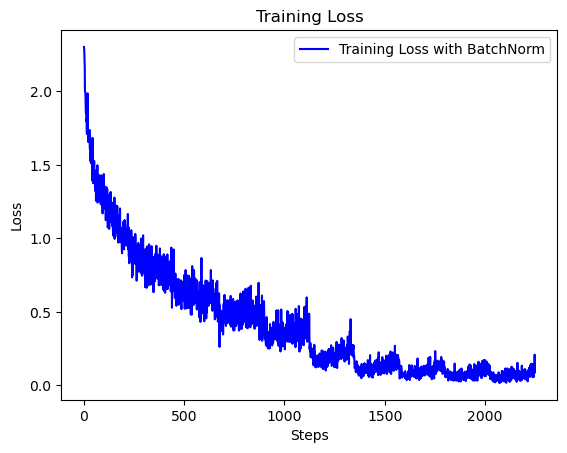

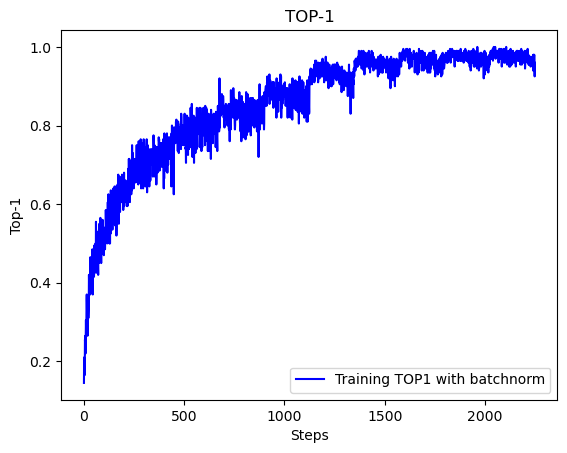

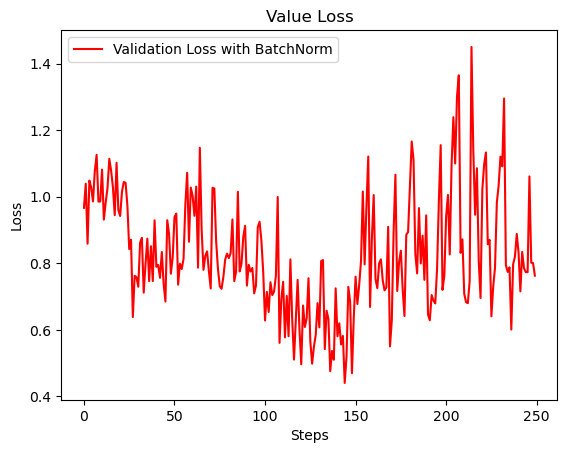

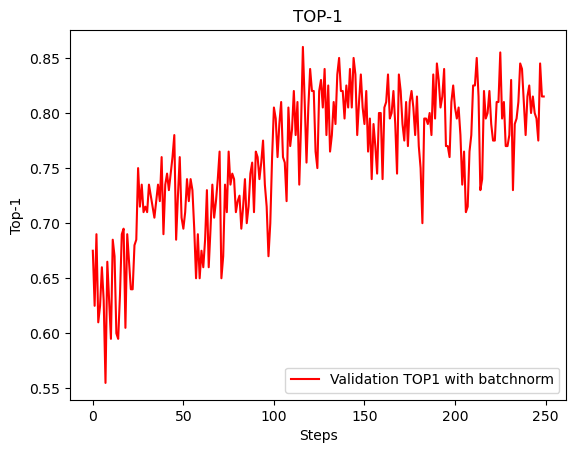

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
train_loss_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_3/run-0603_193034-tag-loss_train.csv")
val_loss_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_3/run-0603_193034-tag-loss_valid.csv")
train_top1_2 = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_3/run-0603_193034-tag-top1_train.csv")
val_top1_2c = pd.read_csv("../../saved/log/CIFAR10_CNN/ques_2/2b_3/run-0603_193034-tag-top1_valid.csv")

plt.plot(train_loss_2['Value'], 'b', label='Training Loss with BatchNorm')
plt.title('Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_top1_2['Value'], 'b', label='Training TOP1 with batchnorm')
plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

plt.plot(val_loss_2['Value'], 'r', label='Validation Loss with BatchNorm')
plt.title('Value Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(val_top1_2c['Value'], 'r', label='Validation TOP1 with batchnorm')
plt.title('TOP-1')
plt.xlabel('Steps')
plt.ylabel('Top-1')
plt.legend()
plt.show()

In [52]:
import numpy as np
print(f"Without Early Stop: {np.max(val_top1_2['Value'])} at Step {np.argmax(val_top1_2['Value'])}")
print(f"With Early Stop:{np.max(val_top1_2c['Value'])} at Step {np.argmax(val_top1_2c['Value'])}")

Without Early Stop: 0.9049999713897704 at Step 342
With Early Stop:0.8600000143051147 at Step 116


- As we can see from above example, with early stop we were able to reach 86% Accuracy in validation set with half the steps(116) when compared to without early step where we got 90% accuracy in twice the step. 

- This also tells that maybe we should tune our early stop criteria, which is right now equal to 4 epochs. Maybe it should be set for more epochs. 

- In practice early stoping with harsh decrease/increase in learning rate is used to make sure if the model is not in local minima. 

### Question 3: Improve generalization of Convolutional Networks (10 points)

We saw in Q2 that the model can start over-fitting to the training set if we continue training for long. To prevent over-fitting, there are two main paradigms we can focus on. The first is to get more training data. This might be a difficult and expensive process involving significant. However, it is generally the most effective way to learn more general models. A cheaper alternative is to perform data augmentation. The second approach is to regularize the model. In the following sub-questions, we will experiment with each of these paradigms and measure the effect on the model generalization. We recommend disabling Early Stopping from previous question (simply removing it from config file) so that it does not interrupt your experiments with data augmentations and you maintain full control over number of epochs.

a) Data augmentation is the process of creating more training data by applying certain transformations to the training set images. Usually, the underlying assumption is that the label of the image does not change under the applied transformations. This includes geometric transformations like translation, rotation, scaling, flipping, random cropping, and color transformations like greyscale, colorjitter. For every image in the training batch, a random transformation is sampled from the possible ones (e.g., a random number of pixels to translate the image by) and is applied to the image. While designing the data input pipeline, we must choose the hyper-parameters for these transformations (e.g., limits of translation or rotation) based on things we expect to see in the test-set/real world. Your task in this question is to implement the data augmentation for the CIFAR-10 classification task. Many of these transformations are implemented in the `torchvision.transforms` package. Familiarize yourself with the APIs of these transforms, and functions to compose multiple transforms or randomly sample them. Next, implement geometric and color space data augmentations for the CIFAR-10 dataset, by choosing the right functions and order of application. Tune the hyper-parameters of these data augmentations to improve the validation performance. You will need to train the model a bit longer (20-30 epochs) with data augmentation, as the training data is effectively larger now. Discuss which augmentations work well for you in the report. (6 points)

b) Dropout is a popular scheme to regularize the model to improve generalization. The dropout layer works by setting the input activations randomly to zero at the output. You can implement Dropout by adding the `torch.nn.Dropout` layer between the conv blocks in your model. The layer has a single hyper-parameter $p$, which is the probability of dropping the input activations. High values of $p$ regularize the model heavily and decrease model capacity, but with low values, the model might overfit. Find the right hyper-parameter for $p$ by training the model for different values of $p$ and comparing training validation and validation accuracies. You can use the same parameter $p$ for all layers. You can also disable the data augmentation from the previous step while running this experiment, to clearly see the benefit of dropout. Show the plot of training and validation accuracies for different values of dropout (0.1 - 0.9) in the report. (4 points)

Wirte your report for Q3 in this cell. Feel free to add extra code cells

<br>
<br>
<br>

### Getting familiar with different Augmentations transform

In [53]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [65]:
trainset = torchvision.datasets.CIFAR10(root='../../data/exercise-2/', train=True, download=True, transform=transform_1)

Files already downloaded and verified


In [66]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)


In [77]:
def try_augmentation(transform_type):
    trainset = torchvision.datasets.CIFAR10(root='../../data/exercise-2/', train=True, download=False, transform=transform_type)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
    fig, axes = plt.subplots(1, len(images), figsize=(10, 4))
    for idx, image in enumerate(images):
        image = image # Unnormalize the image
        image = image.numpy().transpose((1, 2, 0))
        axes[idx].imshow(image)
        axes[idx].set_title(classes[labels[idx]])
        axes[idx].axis('off')

    plt.show()
    

##### Transform 1: RandomHorizontalFlip()

In [82]:
# Define the transformations
transform_1 = transforms.Compose([
    transforms.RandomHorizontalFlip( p = 1),  
    transforms.ToTensor()                  
])

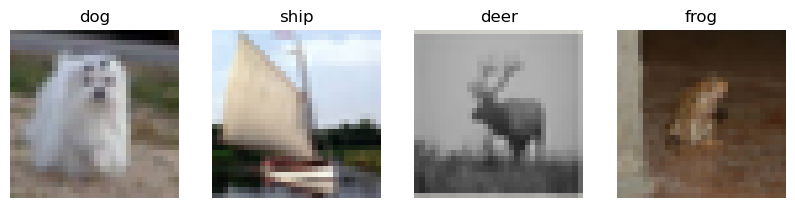

In [83]:
try_augmentation(transform_1)

##### Transform 2: RandomHorizontalFlip()

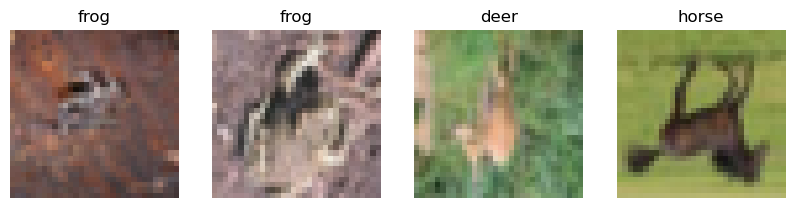

In [88]:
# Define the transformations
transform_1 = transforms.Compose([
    transforms.RandomVerticalFlip(p = 1),  
    transforms.ToTensor()                  
])
try_augmentation(transform_1)

##### Transform 3: RandomResizedCrop()

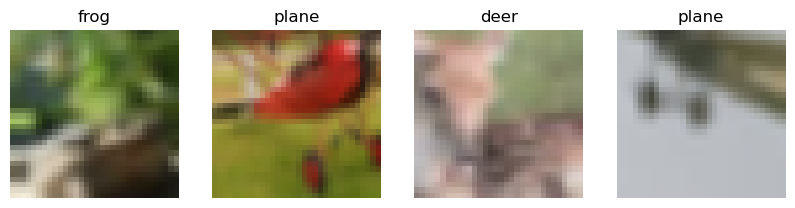

In [90]:
# Define the transformations
transform_1 = transforms.Compose([
   transforms.RandomResizedCrop(size=32, scale=(0.08, 1.0), ratio=(0.75, 1.333)),  
    transforms.ToTensor()                  
])
try_augmentation(transform_1)

##### Transform 4: RandomGrayscale()

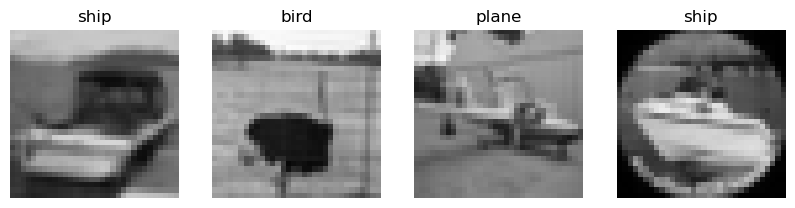

In [91]:
# Define the transformations
transform_1 = transforms.Compose([
    transforms.RandomGrayscale(p=1),  
    transforms.ToTensor()                  
])
try_augmentation(transform_1)

##### Transform 5: GaussianBlur()

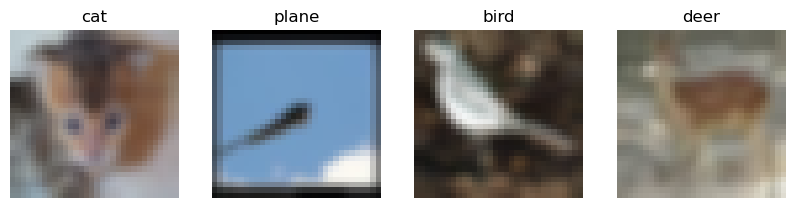

In [92]:
# Define the transformations
transform_1 = transforms.Compose([
    transforms.GaussianBlur(kernel_size=3),  
    transforms.ToTensor()                  
])
try_augmentation(transform_1)

##### Transform 5: ColorJitter()

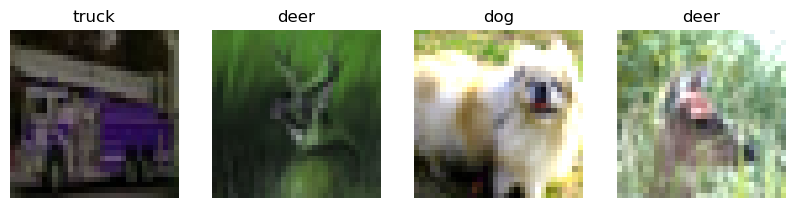

In [94]:
# Define the transformations
transform_1 = transforms.Compose([
    transforms.ColorJitter(brightness=.5, hue=.3),  
    transforms.ToTensor()                  
])
try_augmentation(transform_1)

##### Transform 5: RandomSolarize()

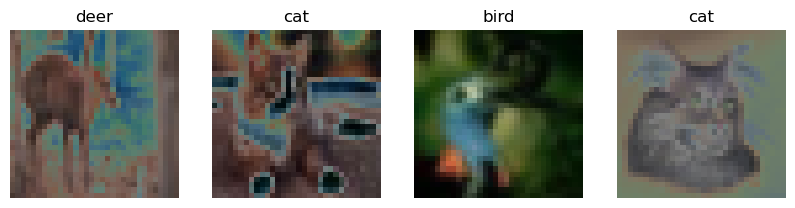

In [96]:
# Define the transformations
transform_1 = transforms.Compose([
    transforms.RandomSolarize(threshold=128),  
    transforms.ToTensor()                  
])
try_augmentation(transform_1)

#### Training without augmentations

In [6]:
config = ConfigParser.wo_args(config='cfgs/exercise-3/cnn_cifar10 (2b_2) .json', root_dir=PROJECT_ROOT)
datamodule = config.init_obj('data_module', module_data,
                             root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                            )

# Based on the heldout_split in the config file, 
# the datamodule will break the dataset into two splits
train_data_loader = datamodule.get_loader()
valid_data_loader = datamodule.get_heldout_loader()

# Test loader is the same as train loader
# except that training=False, shuffle=False, and no splitting is done 
# So we use the exact config from training and just modify these arguments
test_loader_args = deepcopy(config['data_module']['args']) #copy the args
test_loader_args['training']=False
test_loader_args['shuffle']=False
test_loader_args['heldout_split']=0.0

# Now we initialize the test module with the modified config
test_module = getattr(module_data, config['data_module']['type'])(root_dir=PROJECT_ROOT, **test_loader_args)
# And get the loader from it
test_loader = test_module.get_loader()

trainer_cnn = CNNTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)
trainer_cnn.train()

transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
transformations for split eval are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 10000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.1.weight | Trainable Parameters: 128
Layer: layers.1.bias | Trainable Parameters: 128
Layer: layers.4.weight | Trainable Parameters: 589824
Layer: layers.4.bias | Trainable Parameters: 512
Layer: layers.5.weight | Trainable Parameters: 512
Layer: layers.5

  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/50.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.2592683638466728
    top1           : 0.5384444444444444
    top5           : 0.9387111111111106
    eval_loss      : 1.0867456316947937
    eval_top1      : 0.6182000000000001
    eval_top5      : 0.9645999999999999
==> Start Training Epoch 2/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/50.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 0.8116881166564094
    top1           : 0.7116222222222223
    top5           : 0.9800444444444459
    eval_loss      : 0.9121612453460693
    eval_top1      : 0.6966
    eval_top5      : 0.977
==> Start Training Epoch 3/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/50.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 0.6117200810379452
    top1           : 0.7837555555555556
    top5           : 0.9889111111111131
    eval_loss      : 0.6269258809089661
    eval_top1      : 0.7880000000000001
    eval_top5      : 0.9884
==> Start Training Epoch 4/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 4/50.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 0.4608497092458937
    top1           : 0.8395777777777781
    top5           : 0.9932444444444463
    eval_loss      : 0.6324625742435456
    eval_top1      : 0.7921999999999998
    eval_top5      : 0.9893999999999998
==> Start Training Epoch 5/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/50.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 0.34787695440981126
    top1           : 0.8795333333333336
    top5           : 0.996777777777779
    eval_loss      : 0.5849816226959228
    eval_top1      : 0.8041999999999999
    eval_top5      : 0.9897999999999998
==> Start Training Epoch 6/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/50.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 6. Saving Model.....
    epoch          : 6
    loss           : 0.20147533939944373
    top1           : 0.9297555555555557
    top5           : 0.9987333333333341
    eval_loss      : 0.6502017307281495
    eval_top1      : 0.8059999999999999
    eval_top5      : 0.988
==> Start Training Epoch 7/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/50.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 7. Saving Model.....
    epoch          : 7
    loss           : 0.1301807429889838
    top1           : 0.9555333333333339
    top5           : 0.9996444444444447
    eval_loss      : 0.6636729073524475
    eval_top1      : 0.8222
    eval_top5      : 0.9901999999999996
==> Start Training Epoch 8/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/50.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 8. Saving Model.....
    epoch          : 8
    loss           : 0.09837079209585985
    top1           : 0.9654444444444452
    top5           : 0.9999333333333333
    eval_loss      : 0.7010509252548218
    eval_top1      : 0.8257999999999999
    eval_top5      : 0.9895999999999999
==> Start Training Epoch 9/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/50.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
    epoch          : 9
    loss           : 0.07138068286908997
    top1           : 0.9752222222222223
    top5           : 1.0
    eval_loss      : 0.7574706959724427
    eval_top1      : 0.8141999999999997
    eval_top5      : 0.9903999999999996
==> Start Training Epoch 10/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/50.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 10. Saving Model.....
    epoch          : 10
    loss           : 0.06501482422153156
    top1           : 0.9780222222222227
    top5           : 0.9999555555555556
    eval_loss      : 0.7139100241661072
    eval_top1      : 0.826
    eval_top5      : 0.9900000000000001
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/E10_model.pth ...
Checkpoint saved.
==> Start Training Epoch 11/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 11/50.
1
1
++> Evaluate at epoch 11 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 11 Finished.
    epoch          : 11
    loss           : 0.03559572641427318
    top1           : 0.9882000000000017
    top5           : 1.0
    eval_loss      : 0.9266102170944214
    eval_top1      : 0.805
    eval_top5      : 0.9857999999999998
==> Start Training Epoch 12/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 12/50.
1
1
++> Evaluate at epoch 12 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 12 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 12. Saving Model.....
    epoch          : 12
    loss           : 0.01979662976641622
    top1           : 0.9936888888888907
    top5           : 1.0
    eval_loss      : 0.8165953302383423
    eval_top1      : 0.8382
    eval_top5      : 0.988
==> Start Training Epoch 13/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 13/50.
1
1
++> Evaluate at epoch 13 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 13 Finished.
    epoch          : 13
    loss           : 0.025040588655198613
    top1           : 0.9918444444444461
    top5           : 1.0
    eval_loss      : 0.949722056388855
    eval_top1      : 0.8145999999999998
    eval_top5      : 0.9901999999999999
==> Start Training Epoch 14/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 14/50.
1
1
++> Evaluate at epoch 14 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 14 Finished.
    epoch          : 14
    loss           : 0.05286162719544437
    top1           : 0.9813333333333343
    top5           : 0.9999555555555556
    eval_loss      : 0.9151061534881592
    eval_top1      : 0.8034
    eval_top5      : 0.9860000000000001
==> Start Training Epoch 15/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 15/50.
1
1
++> Evaluate at epoch 15 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 15 Finished.
    epoch          : 15
    loss           : 0.042763203214854
    top1           : 0.9858888888888904
    top5           : 1.0
    eval_loss      : 0.8396672868728637
    eval_top1      : 0.8301999999999999
    eval_top5      : 0.9897999999999999
==> Start Training Epoch 16/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 16/50.
1
1
++> Evaluate at epoch 16 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 16 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 16. Saving Model.....
    epoch          : 16
    loss           : 0.015597242124689123
    top1           : 0.9947777777777798
    top5           : 0.9999777777777777
    eval_loss      : 0.82982351064682
    eval_top1      : 0.8386000000000005
    eval_top5      : 0.9917999999999999
==> Start Training Epoch 17/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 17/50.
1
1
++> Evaluate at epoch 17 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 17 Finished.
    epoch          : 17
    loss           : 0.007043323422678643
    top1           : 0.9981111111111121
    top5           : 1.0
    eval_loss      : 0.9015945088863373
    eval_top1      : 0.8385999999999999
    eval_top5      : 0.9882
==> Start Training Epoch 18/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 18/50.
1
1
++> Evaluate at epoch 18 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 18 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 18. Saving Model.....
    epoch          : 18
    loss           : 0.0033899278292018505
    top1           : 0.9992444444444445
    top5           : 1.0
    eval_loss      : 0.8061423993110657
    eval_top1      : 0.8552
    eval_top5      : 0.9897999999999999
==> Start Training Epoch 19/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 19/50.
1
1
++> Evaluate at epoch 19 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 19 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 19. Saving Model.....
    epoch          : 19
    loss           : 0.0006542163809839015
    top1           : 0.9999111111111112
    top5           : 1.0
    eval_loss      : 0.8011621284484863
    eval_top1      : 0.8561999999999999
    eval_top5      : 0.9902000000000001
==> Start Training Epoch 20/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 20/50.
1
1
++> Evaluate at epoch 20 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 20 Finished.
    epoch          : 20
    loss           : 0.0027406980031001796
    top1           : 0.999333333333334
    top5           : 1.0
    eval_loss      : 1.2758982944488526
    eval_top1      : 0.8003999999999999
    eval_top5      : 0.9882
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/E20_model.pth ...
Checkpoint saved.
==> Start Training Epoch 21/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 21/50.
1
1
++> Evaluate at epoch 21 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 21 Finished.
    epoch          : 21
    loss           : 0.04591580770081944
    top1           : 0.984111111111111
    top5           : 1.0
    eval_loss      : 0.8569174671173095
    eval_top1      : 0.8216
    eval_top5      : 0.9897999999999998
==> Start Training Epoch 22/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 22/50.
1
1
++> Evaluate at epoch 22 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 22 Finished.
    epoch          : 22
    loss           : 0.027954783075385625
    top1           : 0.9909555555555578
    top5           : 0.9999777777777777
    eval_loss      : 0.9397914457321167
    eval_top1      : 0.8235999999999999
    eval_top5      : 0.9902
==> Start Training Epoch 23/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 23/50.
1
1
++> Evaluate at epoch 23 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 23 Finished.
    epoch          : 23
    loss           : 0.023202808638517227
    top1           : 0.9918222222222243
    top5           : 1.0
    eval_loss      : 0.9601759076118469
    eval_top1      : 0.8210000000000002
    eval_top5      : 0.9905999999999999
==> Start Training Epoch 24/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 24/50.
1
1
++> Evaluate at epoch 24 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 24 Finished.
    epoch          : 24
    loss           : 0.01529395203002625
    top1           : 0.9951333333333351
    top5           : 1.0
    eval_loss      : 0.9132089853286743
    eval_top1      : 0.8382
    eval_top5      : 0.991
==> Start Training Epoch 25/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 25/50.
1
1
++> Evaluate at epoch 25 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 25 Finished.
    epoch          : 25
    loss           : 0.010353330933980437
    top1           : 0.9967777777777794
    top5           : 1.0
    eval_loss      : 1.0452068090438842
    eval_top1      : 0.8220000000000001
    eval_top5      : 0.9850000000000001
==> Start Training Epoch 26/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 26/50.
1
1
++> Evaluate at epoch 26 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 26 Finished.
    epoch          : 26
    loss           : 0.008336780394117038
    top1           : 0.9971777777777787
    top5           : 1.0
    eval_loss      : 0.8611518049240112
    eval_top1      : 0.8466
    eval_top5      : 0.9904
==> Start Training Epoch 27/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 27/50.
1
1
++> Evaluate at epoch 27 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 27 Finished.
    epoch          : 27
    loss           : 0.0022244615136231814
    top1           : 0.999466666666667
    top5           : 1.0
    eval_loss      : 0.8548839282989502
    eval_top1      : 0.8501999999999998
    eval_top5      : 0.9925999999999999
==> Start Training Epoch 28/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 28/50.
1
1
++> Evaluate at epoch 28 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 28 Finished.
    epoch          : 28
    loss           : 0.0016827965434964023
    top1           : 0.999555555555556
    top5           : 1.0
    eval_loss      : 0.9002915501594544
    eval_top1      : 0.8462
    eval_top5      : 0.9917999999999999
==> Start Training Epoch 29/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 29/50.
1
1
++> Evaluate at epoch 29 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 29 Finished.
    epoch          : 29
    loss           : 0.004856824575949254
    top1           : 0.998733333333334
    top5           : 0.9999777777777777
    eval_loss      : 1.151316957473755
    eval_top1      : 0.8256
    eval_top5      : 0.9887999999999999
==> Start Training Epoch 30/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 30/50.
1
1
++> Evaluate at epoch 30 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 30 Finished.
    epoch          : 30
    loss           : 0.02250869000278827
    top1           : 0.9924000000000016
    top5           : 1.0
    eval_loss      : 1.0152434778213502
    eval_top1      : 0.8281999999999999
    eval_top5      : 0.9865999999999999
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/E30_model.pth ...
Checkpoint saved.
==> Start Training Epoch 31/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 31/50.
1
1
++> Evaluate at epoch 31 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 31 Finished.
    epoch          : 31
    loss           : 0.010222842356112476
    top1           : 0.9967555555555564
    top5           : 1.0
    eval_loss      : 0.9171441125869751
    eval_top1      : 0.8432000000000001
    eval_top5      : 0.9900000000000001
==> Start Training Epoch 32/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 32/50.
1
1
++> Evaluate at epoch 32 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 32 Finished.
    epoch          : 32
    loss           : 0.0015423806517760063
    top1           : 0.9996888888888891
    top5           : 1.0
    eval_loss      : 0.9054624819755555
    eval_top1      : 0.8466
    eval_top5      : 0.9904
==> Start Training Epoch 33/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 33/50.
1
1
++> Evaluate at epoch 33 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 33 Finished.
    epoch          : 33
    loss           : 0.0007613994078322624
    top1           : 0.9998888888888889
    top5           : 1.0
    eval_loss      : 0.8930731248855591
    eval_top1      : 0.8506
    eval_top5      : 0.9902
==> Start Training Epoch 34/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 34/50.
1
1
++> Evaluate at epoch 34 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 34 Finished.
    epoch          : 34
    loss           : 0.0004025629617778274
    top1           : 0.9999333333333333
    top5           : 1.0
    eval_loss      : 0.8867700099945068
    eval_top1      : 0.8532000000000001
    eval_top5      : 0.9913999999999998
==> Start Training Epoch 35/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 35/50.
1
1
++> Evaluate at epoch 35 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 35 Finished.
    epoch          : 35
    loss           : 0.0001402354000876787
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8917157554626465
    eval_top1      : 0.8540000000000003
    eval_top5      : 0.9913999999999996
==> Start Training Epoch 36/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 36/50.
1
1
++> Evaluate at epoch 36 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 36 Finished.
    epoch          : 36
    loss           : 8.271654094440034e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9005227756500244
    eval_top1      : 0.8533999999999999
    eval_top5      : 0.9909999999999998
==> Start Training Epoch 37/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 37/50.
1
1
++> Evaluate at epoch 37 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 37 Finished.
    epoch          : 37
    loss           : 6.466037575996274e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.8983217549324035
    eval_top1      : 0.8525999999999999
    eval_top5      : 0.9909999999999997
==> Start Training Epoch 38/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 38/50.
1
1
++> Evaluate at epoch 38 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 38 Finished.
    epoch          : 38
    loss           : 6.37170263912089e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9012176060676574
    eval_top1      : 0.8521999999999998
    eval_top5      : 0.991
==> Start Training Epoch 39/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 39/50.
1
1
++> Evaluate at epoch 39 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 39 Finished.
    epoch          : 39
    loss           : 5.7880760606268366e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9063616824150086
    eval_top1      : 0.8538000000000001
    eval_top5      : 0.9911999999999999
==> Start Training Epoch 40/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 40/50.
1
1
++> Evaluate at epoch 40 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 40 Finished.
    epoch          : 40
    loss           : 5.5182854614233495e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9082339954376221
    eval_top1      : 0.8541999999999998
    eval_top5      : 0.9901999999999999
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/E40_model.pth ...
Checkpoint saved.
==> Start Training Epoch 41/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 41/50.
1
1
++> Evaluate at epoch 41 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 41 Finished.
    epoch          : 41
    loss           : 5.0885971318671685e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9083723950386048
    eval_top1      : 0.852
    eval_top5      : 0.9910000000000001
==> Start Training Epoch 42/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 42/50.
1
1
++> Evaluate at epoch 42 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 42 Finished.
    epoch          : 42
    loss           : 4.534811787986352e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9261662793159485
    eval_top1      : 0.8532
    eval_top5      : 0.9904
==> Start Training Epoch 43/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 43/50.
1
1
++> Evaluate at epoch 43 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 43 Finished.
    epoch          : 43
    loss           : 4.338603071826381e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9158307123184204
    eval_top1      : 0.851
    eval_top5      : 0.9904
==> Start Training Epoch 44/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 44/50.
1
1
++> Evaluate at epoch 44 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 44 Finished.
    epoch          : 44
    loss           : 4.1496590007833826e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9136190843582154
    eval_top1      : 0.8509999999999998
    eval_top5      : 0.991
==> Start Training Epoch 45/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 45/50.
1
1
++> Evaluate at epoch 45 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 45 Finished.
    epoch          : 45
    loss           : 4.196636815322563e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9280234336853027
    eval_top1      : 0.8515999999999999
    eval_top5      : 0.9906
==> Start Training Epoch 46/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 46/50.
1
1
++> Evaluate at epoch 46 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 46 Finished.
    epoch          : 46
    loss           : 3.8610736721441046e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9377114772796631
    eval_top1      : 0.8495999999999997
    eval_top5      : 0.9897999999999999
==> Start Training Epoch 47/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 47/50.
1
1
++> Evaluate at epoch 47 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 47 Finished.
    epoch          : 47
    loss           : 4.049945648552643e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9433019757270813
    eval_top1      : 0.8486000000000001
    eval_top5      : 0.9895999999999999
==> Start Training Epoch 48/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 48/50.
1
1
++> Evaluate at epoch 48 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 48 Finished.
    epoch          : 48
    loss           : 3.955413990802804e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9390816807746887
    eval_top1      : 0.8478
    eval_top5      : 0.9891999999999999
==> Start Training Epoch 49/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 49/50.
1
1
++> Evaluate at epoch 49 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 49 Finished.
    epoch          : 49
    loss           : 4.920083429978048e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9378346490859986
    eval_top1      : 0.8495999999999998
    eval_top5      : 0.9897999999999999
==> Start Training Epoch 50/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 50/50.
1
1
++> Evaluate at epoch 50 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 50 Finished.
    epoch          : 50
    loss           : 3.5856712480987576e-05
    top1           : 1.0
    top5           : 1.0
    eval_loss      : 0.9500170111656189
    eval_top1      : 0.8494000000000002
    eval_top5      : 0.9897999999999998
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/E50_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_023634/last_model.pth ...
Checkpoint saved.


#### Training with augmentations

In this set of augmentations, we are using:

- RandomCrop: Randomly crops the image to a smaller size while adding padding. It helps add robustness to translation variations in the dataset.
- RandomHorizontalFlip: Randomly flips the image horizontally, introducing diversity and handling left-right orientation variations.
- RandomRotation: Randomly rotates the image by a specified angle, providing robustness to rotation variations.
    ColorJitter: Randomly adjusts brightness, contrast, and saturation of the image, adding variation in color representation.
- ToTensor: Converts the image to a PyTorch tensor.
- Normalize: Normalizes the image pixel values to a range of [-1, 1] for each channel. This helps standardize the input across the dataset.

In [7]:
config = ConfigParser.wo_args(config='cfgs/exercise-3/cnn_cifar10 (3a).json', root_dir=PROJECT_ROOT)
datamodule = config.init_obj('data_module', module_data,
                             root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                            )

# Based on the heldout_split in the config file, 
# the datamodule will break the dataset into two splits
train_data_loader = datamodule.get_loader()
valid_data_loader = datamodule.get_heldout_loader()

# Test loader is the same as train loader
# except that training=False, shuffle=False, and no splitting is done 
# So we use the exact config from training and just modify these arguments
test_loader_args = deepcopy(config['data_module']['args']) #copy the args
test_loader_args['training']=False
test_loader_args['shuffle']=False
test_loader_args['heldout_split']=0.0

# Now we initialize the test module with the modified config
test_module = getattr(module_data, config['data_module']['type'])(root_dir=PROJECT_ROOT, **test_loader_args)
# And get the loader from it
test_loader = test_module.get_loader()

trainer_cnn = CNNTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)
trainer_cnn.train()

transformations for split train are Compose(
    RandomCrop(size=(32, 32), padding=4)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=None)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
transformations for split eval are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 10000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.1.

  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/50.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.5308244302537706
    top1           : 0.43084444444444464
    top5           : 0.902133333333334
    eval_loss      : 1.2865837001800537
    eval_top1      : 0.5328
    eval_top5      : 0.9425999999999998
==> Start Training Epoch 2/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/50.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 1.136176091035207
    top1           : 0.5938888888888888
    top5           : 0.9554888888888896
    eval_loss      : 1.1486574625968933
    eval_top1      : 0.6077999999999999
    eval_top5      : 0.9652
==> Start Training Epoch 3/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/50.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 0.9400986727078756
    top1           : 0.6662888888888893
    top5           : 0.9713555555555562
    eval_loss      : 1.0376410603523254
    eval_top1      : 0.6444
    eval_top5      : 0.9705999999999999
==> Start Training Epoch 4/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 4/50.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 0.8278688576486376
    top1           : 0.7085777777777774
    top5           : 0.9783777777777782
    eval_loss      : 0.8021027851104736
    eval_top1      : 0.7152
    eval_top5      : 0.9801999999999998
==> Start Training Epoch 5/50, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/50.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 0.7496060265435113
    top1           : 0.7369555555555559
    top5           : 0.9822444444444447
    eval_loss      : 0.7507118797302246
    eval_top1      : 0.7405999999999999
    eval_top5      : 0.9833999999999999
==> Start Training Epoch 6/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/50.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 6. Saving Model.....
    epoch          : 6
    loss           : 0.6592700970172882
    top1           : 0.7689333333333335
    top5           : 0.9864444444444467
    eval_loss      : 0.7430651640892029
    eval_top1      : 0.7414000000000001
    eval_top5      : 0.9840000000000001
==> Start Training Epoch 7/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/50.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 7. Saving Model.....
    epoch          : 7
    loss           : 0.6213839572005802
    top1           : 0.7852222222222225
    top5           : 0.9880444444444466
    eval_loss      : 0.6489567685127259
    eval_top1      : 0.7748
    eval_top5      : 0.9875999999999998
==> Start Training Epoch 8/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/50.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
    epoch          : 8
    loss           : 0.5764984051386516
    top1           : 0.7973555555555552
    top5           : 0.9894222222222246
    eval_loss      : 0.6641623711585999
    eval_top1      : 0.7688000000000001
    eval_top5      : 0.9837999999999997
==> Start Training Epoch 9/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/50.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 9. Saving Model.....
    epoch          : 9
    loss           : 0.5458792840109931
    top1           : 0.8081777777777777
    top5           : 0.9906000000000021
    eval_loss      : 0.6848853182792664
    eval_top1      : 0.7798000000000002
    eval_top5      : 0.9813999999999998
==> Start Training Epoch 10/50, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/50.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 10. Saving Model.....
    epoch          : 10
    loss           : 0.5121056020259858
    top1           : 0.820111111111111
    top5           : 0.992288888888891
    eval_loss      : 0.5785951864719391
    eval_top1      : 0.804
    eval_top5      : 0.9895999999999997
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/E10_model.pth ...
Checkpoint saved.
==> Start Training Epoch 11/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 11/50.
1
1
++> Evaluate at epoch 11 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 11 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 11. Saving Model.....
    epoch          : 11
    loss           : 0.4518930606047312
    top1           : 0.8416444444444441
    top5           : 0.9938444444444464
    eval_loss      : 0.5595729994773865
    eval_top1      : 0.8124000000000001
    eval_top5      : 0.9896
==> Start Training Epoch 12/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 12/50.
1
1
++> Evaluate at epoch 12 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 12 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 12. Saving Model.....
    epoch          : 12
    loss           : 0.43481098267767165
    top1           : 0.8486666666666666
    top5           : 0.9941333333333355
    eval_loss      : 0.5330799090862274
    eval_top1      : 0.8125999999999999
    eval_top5      : 0.9913999999999998
==> Start Training Epoch 13/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 13/50.
1
1
++> Evaluate at epoch 13 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 13 Finished.
    epoch          : 13
    loss           : 0.41255185882250467
    top1           : 0.8549777777777783
    top5           : 0.9945111111111132
    eval_loss      : 0.5612677085399628
    eval_top1      : 0.8075999999999999
    eval_top5      : 0.9911999999999999
==> Start Training Epoch 14/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 14/50.
1
1
++> Evaluate at epoch 14 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 14 Finished.
    epoch          : 14
    loss           : 0.3988953400982751
    top1           : 0.860311111111111
    top5           : 0.9952444444444465
    eval_loss      : 0.5655953180789948
    eval_top1      : 0.8075999999999998
    eval_top5      : 0.9906000000000001
==> Start Training Epoch 15/50, lr=0.001280 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 15/50.
1
1
++> Evaluate at epoch 15 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 15 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 15. Saving Model.....
    epoch          : 15
    loss           : 0.3849934162033929
    top1           : 0.8670666666666665
    top5           : 0.996200000000002
    eval_loss      : 0.5419149196147919
    eval_top1      : 0.8176000000000002
    eval_top5      : 0.9895999999999997
==> Start Training Epoch 16/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 16/50.
1
1
++> Evaluate at epoch 16 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 16 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 16. Saving Model.....
    epoch          : 16
    loss           : 0.3426035216781828
    top1           : 0.8801333333333324
    top5           : 0.9965777777777792
    eval_loss      : 0.4960227179527283
    eval_top1      : 0.8317999999999998
    eval_top5      : 0.9922
==> Start Training Epoch 17/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 17/50.
1
1
++> Evaluate at epoch 17 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 17 Finished.
    epoch          : 17
    loss           : 0.3218692358334859
    top1           : 0.8895555555555562
    top5           : 0.9971555555555566
    eval_loss      : 0.5375950479507446
    eval_top1      : 0.8181999999999999
    eval_top5      : 0.9940000000000001
==> Start Training Epoch 18/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 18/50.
1
1
++> Evaluate at epoch 18 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 18 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 18. Saving Model.....
    epoch          : 18
    loss           : 0.31082097729047137
    top1           : 0.8897111111111108
    top5           : 0.9974444444444455
    eval_loss      : 0.4903546714782715
    eval_top1      : 0.8366
    eval_top5      : 0.9917999999999998
==> Start Training Epoch 19/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 19/50.
1
1
++> Evaluate at epoch 19 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 19 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 19. Saving Model.....
    epoch          : 19
    loss           : 0.2977076682779524
    top1           : 0.8952444444444441
    top5           : 0.99768888888889
    eval_loss      : 0.497554839849472
    eval_top1      : 0.8388
    eval_top5      : 0.9906
==> Start Training Epoch 20/50, lr=0.001024 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 20/50.
1
1
++> Evaluate at epoch 20 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 20 Finished.
    epoch          : 20
    loss           : 0.28969553132851916
    top1           : 0.8975555555555551
    top5           : 0.9981555555555566
    eval_loss      : 0.5389693903923035
    eval_top1      : 0.8271999999999999
    eval_top5      : 0.9911999999999997
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/E20_model.pth ...
Checkpoint saved.
==> Start Training Epoch 21/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 21/50.
1
1
++> Evaluate at epoch 21 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 21 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 21. Saving Model.....
    epoch          : 21
    loss           : 0.2528216816981633
    top1           : 0.9106000000000005
    top5           : 0.9984444444444452
    eval_loss      : 0.4635966622829437
    eval_top1      : 0.8482
    eval_top5      : 0.9925999999999999
==> Start Training Epoch 22/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 22/50.
1
1
++> Evaluate at epoch 22 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 22 Finished.
    epoch          : 22
    loss           : 0.23662656131717894
    top1           : 0.9184000000000004
    top5           : 0.9984222222222229
    eval_loss      : 0.4806965661048889
    eval_top1      : 0.8450000000000003
    eval_top5      : 0.9919999999999999
==> Start Training Epoch 23/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 23/50.
1
1
++> Evaluate at epoch 23 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 23 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 23. Saving Model.....
    epoch          : 23
    loss           : 0.22645314819282955
    top1           : 0.9200222222222229
    top5           : 0.9986444444444449
    eval_loss      : 0.44250304698944093
    eval_top1      : 0.8529999999999999
    eval_top5      : 0.9942
==> Start Training Epoch 24/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 24/50.
1
1
++> Evaluate at epoch 24 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 24 Finished.
    epoch          : 24
    loss           : 0.22316318035125732
    top1           : 0.9225111111111102
    top5           : 0.9986888888888896
    eval_loss      : 0.4515185439586639
    eval_top1      : 0.8506
    eval_top5      : 0.9933999999999998
==> Start Training Epoch 25/50, lr=0.000819 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 25/50.
1
1
++> Evaluate at epoch 25 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 25 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 25. Saving Model.....
    epoch          : 25
    loss           : 0.2121004139052497
    top1           : 0.9246888888888888
    top5           : 0.9991333333333339
    eval_loss      : 0.48221211552619936
    eval_top1      : 0.8548000000000002
    eval_top5      : 0.993
==> Start Training Epoch 26/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 26/50.
1
1
++> Evaluate at epoch 26 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 26 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 26. Saving Model.....
    epoch          : 26
    loss           : 0.1870322968893581
    top1           : 0.9347333333333333
    top5           : 0.9993333333333335
    eval_loss      : 0.45526052355766294
    eval_top1      : 0.8572000000000002
    eval_top5      : 0.9939999999999998
==> Start Training Epoch 27/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 27/50.
1
1
++> Evaluate at epoch 27 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 27 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 27. Saving Model.....
    epoch          : 27
    loss           : 0.18025028778447044
    top1           : 0.9364444444444444
    top5           : 0.9991555555555562
    eval_loss      : 0.46138909220695495
    eval_top1      : 0.8610000000000001
    eval_top5      : 0.9928
==> Start Training Epoch 28/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 28/50.
1
1
++> Evaluate at epoch 28 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 28 Finished.
    epoch          : 28
    loss           : 0.16841361777649985
    top1           : 0.9410666666666666
    top5           : 0.9993555555555559
    eval_loss      : 0.46109886169433595
    eval_top1      : 0.8585999999999998
    eval_top5      : 0.9941999999999999
==> Start Training Epoch 29/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 29/50.
1
1
++> Evaluate at epoch 29 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 29 Finished.
    epoch          : 29
    loss           : 0.1632291700773769
    top1           : 0.9424222222222223
    top5           : 0.9994888888888892
    eval_loss      : 0.48714820146560667
    eval_top1      : 0.8523999999999999
    eval_top5      : 0.9923999999999998
==> Start Training Epoch 30/50, lr=0.000655 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 30/50.
1
1
++> Evaluate at epoch 30 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 30 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 30. Saving Model.....
    epoch          : 30
    loss           : 0.16125703612963357
    top1           : 0.9429777777777776
    top5           : 0.9993555555555559
    eval_loss      : 0.45582317233085634
    eval_top1      : 0.8627999999999997
    eval_top5      : 0.9945999999999997
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/E30_model.pth ...
Checkpoint saved.
==> Start Training Epoch 31/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 31/50.
1
1
++> Evaluate at epoch 31 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 31 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 31. Saving Model.....
    epoch          : 31
    loss           : 0.1387881777352757
    top1           : 0.9504666666666663
    top5           : 0.999577777777778
    eval_loss      : 0.422328040599823
    eval_top1      : 0.8687999999999999
    eval_top5      : 0.9945999999999997
==> Start Training Epoch 32/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 32/50.
1
1
++> Evaluate at epoch 32 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 32 Finished.
    epoch          : 32
    loss           : 0.1360305615928438
    top1           : 0.9519777777777775
    top5           : 0.9996444444444447
    eval_loss      : 0.46506455779075623
    eval_top1      : 0.8645999999999999
    eval_top5      : 0.993
==> Start Training Epoch 33/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 33/50.
1
1
++> Evaluate at epoch 33 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 33 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 33. Saving Model.....
    epoch          : 33
    loss           : 0.12976885103517108
    top1           : 0.9528
    top5           : 0.9998000000000001
    eval_loss      : 0.4585687518119812
    eval_top1      : 0.8708000000000001
    eval_top5      : 0.9949999999999999
==> Start Training Epoch 34/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 34/50.
1
1
++> Evaluate at epoch 34 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 34 Finished.
    epoch          : 34
    loss           : 0.1259044008453687
    top1           : 0.955555555555555
    top5           : 0.999577777777778
    eval_loss      : 0.4528607153892517
    eval_top1      : 0.866
    eval_top5      : 0.9942
==> Start Training Epoch 35/50, lr=0.000524 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 35/50.
1
1
++> Evaluate at epoch 35 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 35 Finished.
    epoch          : 35
    loss           : 0.12198213102089034
    top1           : 0.9563555555555562
    top5           : 0.9998222222222224
    eval_loss      : 0.4478652745485306
    eval_top1      : 0.8666000000000001
    eval_top5      : 0.9943999999999997
==> Start Training Epoch 36/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 36/50.
1
1
++> Evaluate at epoch 36 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 36 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 36. Saving Model.....
    epoch          : 36
    loss           : 0.10723662260505888
    top1           : 0.9629999999999993
    top5           : 0.9999111111111112
    eval_loss      : 0.43432984709739686
    eval_top1      : 0.8745999999999999
    eval_top5      : 0.9933999999999998
==> Start Training Epoch 37/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 37/50.
1
1
++> Evaluate at epoch 37 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 37 Finished.
    epoch          : 37
    loss           : 0.10203165368901358
    top1           : 0.9645999999999999
    top5           : 0.9998888888888889
    eval_loss      : 0.4626555573940277
    eval_top1      : 0.8661999999999999
    eval_top5      : 0.9944
==> Start Training Epoch 38/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 38/50.
1
1
++> Evaluate at epoch 38 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 38 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 38. Saving Model.....
    epoch          : 38
    loss           : 0.09416959236065546
    top1           : 0.9675555555555552
    top5           : 0.9998444444444445
    eval_loss      : 0.45312598943710325
    eval_top1      : 0.8768
    eval_top5      : 0.9936
==> Start Training Epoch 39/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 39/50.
1
1
++> Evaluate at epoch 39 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 39 Finished.
    epoch          : 39
    loss           : 0.09487570662465361
    top1           : 0.9671777777777778
    top5           : 0.9998666666666668
    eval_loss      : 0.4810744023323059
    eval_top1      : 0.8724
    eval_top5      : 0.9943999999999998
==> Start Training Epoch 40/50, lr=0.000419 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 40/50.
1
1
++> Evaluate at epoch 40 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 40 Finished.
    epoch          : 40
    loss           : 0.09220100563433435
    top1           : 0.9679333333333326
    top5           : 0.9998444444444445
    eval_loss      : 0.4803378999233246
    eval_top1      : 0.8706000000000003
    eval_top5      : 0.9935999999999998
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/E40_model.pth ...
Checkpoint saved.
==> Start Training Epoch 41/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 41/50.
1
1
++> Evaluate at epoch 41 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 41 Finished.
    epoch          : 41
    loss           : 0.08190600753658347
    top1           : 0.971311111111111
    top5           : 0.9998888888888889
    eval_loss      : 0.47038910508155823
    eval_top1      : 0.8708
    eval_top5      : 0.9939999999999999
==> Start Training Epoch 42/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 42/50.
1
1
++> Evaluate at epoch 42 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 42 Finished.
    epoch          : 42
    loss           : 0.07777810961008072
    top1           : 0.9728222222222218
    top5           : 0.9999111111111112
    eval_loss      : 0.46920971393585204
    eval_top1      : 0.8717999999999998
    eval_top5      : 0.9947999999999999
==> Start Training Epoch 43/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 43/50.
1
1
++> Evaluate at epoch 43 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 43 Finished.
    epoch          : 43
    loss           : 0.07732897310621209
    top1           : 0.9721999999999997
    top5           : 0.9999111111111112
    eval_loss      : 0.4480451607704163
    eval_top1      : 0.8767999999999999
    eval_top5      : 0.9939999999999998
==> Start Training Epoch 44/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 44/50.
1
1
++> Evaluate at epoch 44 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 44 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 44. Saving Model.....
    epoch          : 44
    loss           : 0.0743905199567477
    top1           : 0.9739333333333329
    top5           : 0.9999555555555556
    eval_loss      : 0.46315088093280793
    eval_top1      : 0.8775999999999999
    eval_top5      : 0.9935999999999998
==> Start Training Epoch 45/50, lr=0.000336 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 45/50.
1
1
++> Evaluate at epoch 45 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 45 Finished.
    epoch          : 45
    loss           : 0.07298443544242117
    top1           : 0.974333333333333
    top5           : 0.9999111111111112
    eval_loss      : 0.48273142337799074
    eval_top1      : 0.8711999999999998
    eval_top5      : 0.9944000000000002
==> Start Training Epoch 46/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 46/50.
1
1
++> Evaluate at epoch 46 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 46 Finished.
    epoch          : 46
    loss           : 0.06822911244299677
    top1           : 0.9765777777777783
    top5           : 0.9999333333333333
    eval_loss      : 0.46965494751930237
    eval_top1      : 0.8775999999999999
    eval_top5      : 0.9947999999999999
==> Start Training Epoch 47/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 47/50.
1
1
++> Evaluate at epoch 47 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 47 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 47. Saving Model.....
    epoch          : 47
    loss           : 0.0622081269034081
    top1           : 0.9790000000000002
    top5           : 0.9999333333333333
    eval_loss      : 0.47088070154190065
    eval_top1      : 0.8781999999999998
    eval_top5      : 0.9954000000000001
==> Start Training Epoch 48/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 48/50.
1
1
++> Evaluate at epoch 48 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 48 Finished.
    epoch          : 48
    loss           : 0.06295643963747555
    top1           : 0.9781777777777776
    top5           : 0.9999333333333333
    eval_loss      : 0.46325302481651304
    eval_top1      : 0.8745999999999999
    eval_top5      : 0.9959999999999998
==> Start Training Epoch 49/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 49/50.
1
1
++> Evaluate at epoch 49 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 49 Finished.
    epoch          : 49
    loss           : 0.06453306576444043
    top1           : 0.9771111111111114
    top5           : 0.9999777777777777
    eval_loss      : 0.462490217089653
    eval_top1      : 0.8771999999999999
    eval_top5      : 0.9941999999999998
==> Start Training Epoch 50/50, lr=0.000268 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 50/50.
1
1
++> Evaluate at epoch 50 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 50 Finished.
    epoch          : 50
    loss           : 0.06076304485400518
    top1           : 0.9794444444444442
    top5           : 0.9999555555555556
    eval_loss      : 0.5057221174240112
    eval_top1      : 0.8759999999999997
    eval_top5      : 0.9937999999999999
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/E50_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_024513/last_model.pth ...
Checkpoint saved.


### Results 3a

- The following are the result of with and without augmentaions. 

**Note**: White is with augmentaion and green is without augmentation. (The graphs are smoothed) \n
Training Loss:
![](../../data/exercise-3/ques3/Training_loss.png)

- We can see the trainig loss does not converge to zero. The model is still learning more because we have introduced augmentation. 

Validation Loss:
![](../../data/exercise-3/ques3/Validation_loss.png)
- Unlike not using augmentation, the model overfits and model loss after few epochs starts to increase. On the otherside, the validation loss on the model trained with augmented data continues to decrease. 


Train Top1:
![](../../data/exercise-3/ques3/training_top1.png)

Validation Top1:
![](../../data/exercise-3/ques3/Validation_top1.png)
- The model should be trained for more epochs. In last few epochs it has surpassed the without augmentation model. 

#### Q3b

In this question we are checking the effect of dropout. We will be checking the efffect of dropout from range of 0.1 to 0.9 with step of 0.2, i.e [0.1,0.3,0.5,0.7,0.9]. 

In [10]:
D = [0.1,0.3,0.5,0.7,0.9]

for i in D: 
    config = ConfigParser.wo_args(config=f'cfgs/exercise-3/cnn_cifar10 (3b_1) ({i}).json', root_dir=PROJECT_ROOT)
    datamodule = config.init_obj('data_module', module_data,
                                 root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                                )

    # Based on the heldout_split in the config file, 
    # the datamodule will break the dataset into two splits
    train_data_loader = datamodule.get_loader()
    valid_data_loader = datamodule.get_heldout_loader()

    trainer_cnn = CNNTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)
    trainer_cnn.train()

transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.1.weight | Trainable Parameters: 128
Layer: layers.1.bias | Trainable Parameters: 128
Layer: layers.5.weight | Trainable Parameters: 589824
Layer: layers.5.bias | Trainable Parameters: 512
Layer: layers.6.weight | Trainable Parameters: 512
Layer: layers.6.bias | Trainable Parameters: 512
Layer: layers.10.weight | Trainable Parameters: 2359296
Layer: layers.10.bias | Trainable Parameters: 512
Layer: layers.11.weight | Trainable Parameters: 512
Layer: layers.11.bias | Trainable Parameters: 512
Layer: layers.15.we

  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/10.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_131551/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.2889748912387424
    top1           : 0.5255333333333332
    top5           : 0.9345111111111113
    eval_loss      : 1.2126214909553528
    eval_top1      : 0.5738
    eval_top5      : 0.9579999999999999
==> Start Training Epoch 2/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/10.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_131551/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 0.8352380283673604
    top1           : 0.7034666666666666
    top5           : 0.9777777777777786
    eval_loss      : 0.7326323342323303
    eval_top1      : 0.7437999999999999
    eval_top5      : 0.9825999999999999
==> Start Training Epoch 3/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/10.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_131551/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 0.6472776907020145
    top1           : 0.772688888888889
    top5           : 0.9876666666666687
    eval_loss      : 0.723753638267517
    eval_top1      : 0.7548
    eval_top5      : 0.9801999999999998
==> Start Training Epoch 4/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 4/10.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_131551/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 0.5251305207941267
    top1           : 0.8191111111111112
    top5           : 0.991955555555558
    eval_loss      : 0.6276412558555603
    eval_top1      : 0.791
    eval_top5      : 0.986
==> Start Training Epoch 5/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/10.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_131551/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 0.424834734333886
    top1           : 0.8518222222222217
    top5           : 0.9944666666666687
    eval_loss      : 0.5874922931194305
    eval_top1      : 0.8031999999999999
    eval_top5      : 0.9886
==> Start Training Epoch 6/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/10.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_131551/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 6. Saving Model.....
    epoch          : 6
    loss           : 0.28662149813440113
    top1           : 0.9002444444444441
    top5           : 0.9974222222222238
    eval_loss      : 0.5532617259025574
    eval_top1      : 0.8185999999999997
    eval_top5      : 0.9906
==> Start Training Epoch 7/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/10.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
    epoch          : 7
    loss           : 0.22128665457169214
    top1           : 0.9228222222222225
    top5           : 0.9988444444444452
    eval_loss      : 0.6457397198677063
    eval_top1      : 0.8184
    eval_top5      : 0.9912000000000001
==> Start Training Epoch 8/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/10.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_131551/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 8. Saving Model.....
    epoch          : 8
    loss           : 0.17975723203685548
    top1           : 0.9371777777777772
    top5           : 0.9994444444444447
    eval_loss      : 0.5858981597423554
    eval_top1      : 0.8292
    eval_top5      : 0.9912000000000001
==> Start Training Epoch 9/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/10.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_131551/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 9. Saving Model.....
    epoch          : 9
    loss           : 0.14012598507934146
    top1           : 0.9511777777777776
    top5           : 0.9997111111111113
    eval_loss      : 0.6125423574447632
    eval_top1      : 0.8345999999999999
    eval_top5      : 0.9934000000000001
==> Start Training Epoch 10/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/10.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
    epoch          : 10
    loss           : 0.10559764920009507
    top1           : 0.9633111111111109
    top5           : 0.9998222222222224
    eval_loss      : 0.6570915007591247
    eval_top1      : 0.8304
    eval_top5      : 0.9919999999999999
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_131551/E10_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_131551/last_model.pth ...
Checkpoint saved.
transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.1.weight | Trainable Parameters: 1

  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/10.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_132656/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.3827677517467074
    top1           : 0.4880888888888889
    top5           : 0.9237333333333342
    eval_loss      : 1.1387173628807068
    eval_top1      : 0.596
    eval_top5      : 0.9643999999999999
==> Start Training Epoch 2/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/10.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_132656/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 0.9631636243396335
    top1           : 0.6556444444444441
    top5           : 0.9714222222222223
    eval_loss      : 0.8615690398216248
    eval_top1      : 0.7020000000000001
    eval_top5      : 0.9769999999999999
==> Start Training Epoch 3/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/10.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_132656/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 0.7968775876363119
    top1           : 0.7195555555555562
    top5           : 0.980266666666667
    eval_loss      : 0.7157854676246643
    eval_top1      : 0.7534000000000001
    eval_top5      : 0.9868000000000001
==> Start Training Epoch 4/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 4/10.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
    epoch          : 4
    loss           : 0.6766188658608331
    top1           : 0.7650222222222225
    top5           : 0.986288888888891
    eval_loss      : 0.7474352216720581
    eval_top1      : 0.7509999999999999
    eval_top5      : 0.98
==> Start Training Epoch 5/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/10.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_132656/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 0.5968873666392432
    top1           : 0.7903999999999998
    top5           : 0.990155555555557
    eval_loss      : 0.6807215142250062
    eval_top1      : 0.7684000000000002
    eval_top5      : 0.9878
==> Start Training Epoch 6/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/10.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_132656/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 6. Saving Model.....
    epoch          : 6
    loss           : 0.49822397139337327
    top1           : 0.8271111111111108
    top5           : 0.9931333333333356
    eval_loss      : 0.5530366599559784
    eval_top1      : 0.8156
    eval_top5      : 0.9911999999999999
==> Start Training Epoch 7/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/10.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_132656/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 7. Saving Model.....
    epoch          : 7
    loss           : 0.4341248291068607
    top1           : 0.848244444444444
    top5           : 0.9949555555555579
    eval_loss      : 0.5453736770153046
    eval_top1      : 0.8190000000000002
    eval_top5      : 0.9913999999999998
==> Start Training Epoch 8/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/10.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_132656/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 8. Saving Model.....
    epoch          : 8
    loss           : 0.38702536503473917
    top1           : 0.8646222222222231
    top5           : 0.9961333333333353
    eval_loss      : 0.5397940826416016
    eval_top1      : 0.8230000000000001
    eval_top5      : 0.9928
==> Start Training Epoch 9/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/10.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
    epoch          : 9
    loss           : 0.3518689203262329
    top1           : 0.8761777777777776
    top5           : 0.9974888888888903
    eval_loss      : 0.6432113480567933
    eval_top1      : 0.7988000000000001
    eval_top5      : 0.9900000000000003
==> Start Training Epoch 10/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/10.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_132656/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 10. Saving Model.....
    epoch          : 10
    loss           : 0.3153144616550869
    top1           : 0.8885333333333332
    top5           : 0.9980666666666677
    eval_loss      : 0.5811656594276429
    eval_top1      : 0.8248000000000001
    eval_top5      : 0.9915999999999999
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_132656/E10_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_132656/last_model.pth ...
Checkpoint saved.
transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shu

  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/10.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.495541919602288
    top1           : 0.4450888888888893
    top5           : 0.9092222222222227
    eval_loss      : 1.10091717004776
    eval_top1      : 0.5984
    eval_top5      : 0.9634
==> Start Training Epoch 2/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/10.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 1.1199838950898913
    top1           : 0.597888888888889
    top5           : 0.9605111111111103
    eval_loss      : 0.9095012950897217
    eval_top1      : 0.6803999999999999
    eval_top5      : 0.9725999999999998
==> Start Training Epoch 3/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/10.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 0.9626317387157016
    top1           : 0.6576222222222228
    top5           : 0.9717333333333329
    eval_loss      : 0.8376437282562256
    eval_top1      : 0.7008
    eval_top5      : 0.9813999999999998
==> Start Training Epoch 4/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 4/10.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 0.8670966045061748
    top1           : 0.6935111111111119
    top5           : 0.9771777777777778
    eval_loss      : 0.7990214347839355
    eval_top1      : 0.7123999999999999
    eval_top5      : 0.9821999999999999
==> Start Training Epoch 5/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/10.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 0.7986907707320319
    top1           : 0.7175777777777778
    top5           : 0.9806888888888898
    eval_loss      : 0.7408842611312866
    eval_top1      : 0.7446
    eval_top5      : 0.9839999999999999
==> Start Training Epoch 6/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/10.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 6. Saving Model.....
    epoch          : 6
    loss           : 0.7216131846110027
    top1           : 0.7488222222222224
    top5           : 0.9843555555555566
    eval_loss      : 0.6932841491699219
    eval_top1      : 0.7571999999999999
    eval_top5      : 0.9857999999999998
==> Start Training Epoch 7/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/10.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 7. Saving Model.....
    epoch          : 7
    loss           : 0.6695007995764415
    top1           : 0.7650222222222224
    top5           : 0.9872666666666682
    eval_loss      : 0.6893093013763427
    eval_top1      : 0.7642000000000002
    eval_top5      : 0.9890000000000001
==> Start Training Epoch 8/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/10.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 8. Saving Model.....
    epoch          : 8
    loss           : 0.639432510667377
    top1           : 0.7774444444444445
    top5           : 0.9882444444444457
    eval_loss      : 0.6424106383323669
    eval_top1      : 0.7802000000000002
    eval_top5      : 0.9871999999999997
==> Start Training Epoch 9/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/10.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 9. Saving Model.....
    epoch          : 9
    loss           : 0.6022479722234938
    top1           : 0.7895777777777774
    top5           : 0.9902222222222244
    eval_loss      : 0.6219528222084045
    eval_top1      : 0.787
    eval_top5      : 0.9873999999999999
==> Start Training Epoch 10/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/10.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 10. Saving Model.....
    epoch          : 10
    loss           : 0.5731716419590844
    top1           : 0.8003999999999996
    top5           : 0.9908666666666682
    eval_loss      : 0.5695894062519073
    eval_top1      : 0.8070000000000002
    eval_top5      : 0.9892000000000002
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/E10_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_133800/last_model.pth ...
Checkpoint saved.
transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shu

  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/10.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_134907/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.7678669706980388
    top1           : 0.3323777777777777
    top5           : 0.8611555555555556
    eval_loss      : 1.7386847925186157
    eval_top1      : 0.3802
    eval_top5      : 0.8556
==> Start Training Epoch 2/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/10.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
    epoch          : 2
    loss           : 1.45362581676907
    top1           : 0.4619555555555555
    top5           : 0.9246222222222222
    eval_loss      : 1.686472110748291
    eval_top1      : 0.3776
    eval_top5      : 0.8867999999999999
==> Start Training Epoch 3/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/10.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_134907/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 1.3093331151538425
    top1           : 0.5226888888888889
    top5           : 0.9423333333333327
    eval_loss      : 1.4941610622406005
    eval_top1      : 0.4722000000000001
    eval_top5      : 0.9218
==> Start Training Epoch 4/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 4/10.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_134907/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 1.2202347013685437
    top1           : 0.5603777777777776
    top5           : 0.950355555555555
    eval_loss      : 1.2995734977722169
    eval_top1      : 0.5492
    eval_top5      : 0.9386
==> Start Training Epoch 5/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/10.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_134907/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 1.1499476997057596
    top1           : 0.5863777777777776
    top5           : 0.9576000000000003
    eval_loss      : 1.1241852140426636
    eval_top1      : 0.6038
    eval_top5      : 0.9581999999999996
==> Start Training Epoch 6/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/10.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
    epoch          : 6
    loss           : 1.0859647554821439
    top1           : 0.6106888888888886
    top5           : 0.9626888888888891
    eval_loss      : 1.2728682899475097
    eval_top1      : 0.5577999999999999
    eval_top5      : 0.9418000000000002
==> Start Training Epoch 7/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/10.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
    epoch          : 7
    loss           : 1.0435048066245185
    top1           : 0.6270444444444445
    top5           : 0.966444444444444
    eval_loss      : 1.150044445991516
    eval_top1      : 0.6028
    eval_top5      : 0.9555999999999999
==> Start Training Epoch 8/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/10.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_134907/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 8. Saving Model.....
    epoch          : 8
    loss           : 1.0092344702614677
    top1           : 0.6394000000000004
    top5           : 0.9693111111111116
    eval_loss      : 1.0308046674728393
    eval_top1      : 0.6302000000000001
    eval_top5      : 0.9656
==> Start Training Epoch 9/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/10.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_134907/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 9. Saving Model.....
    epoch          : 9
    loss           : 0.9844742160373264
    top1           : 0.6499111111111104
    top5           : 0.9693777777777772
    eval_loss      : 1.0021975326538086
    eval_top1      : 0.6456000000000001
    eval_top5      : 0.9703999999999999
==> Start Training Epoch 10/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/10.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
    epoch          : 10
    loss           : 0.9563864639070299
    top1           : 0.6605111111111113
    top5           : 0.9715555555555564
    eval_loss      : 1.025622923374176
    eval_top1      : 0.6417999999999999
    eval_top5      : 0.9607999999999997
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_134907/E10_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_134907/last_model.pth ...
Checkpoint saved.
transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}
Layer: layers.0.weight | Trainable Parameters: 3456
Layer: layers.0.bias | Trainable Parameters: 128
Layer: layers.1.weight | Trainable Par

  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 1/10.
1
1
++> Evaluate at epoch 1 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_140014/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 2.2204482062657673
    top1           : 0.1732222222222223
    top5           : 0.7346888888888886
    eval_loss      : 2.9623155975341797
    eval_top1      : 0.09499999999999999
    eval_top5      : 0.49800000000000005
==> Start Training Epoch 2/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 2/10.
1
1
++> Evaluate at epoch 2 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_140014/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 2.0116625012291802
    top1           : 0.2037555555555555
    top5           : 0.8072222222222224
    eval_loss      : 3.135679349899292
    eval_top1      : 0.09759999999999999
    eval_top5      : 0.49800000000000005
==> Start Training Epoch 3/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 3/10.
1
1
++> Evaluate at epoch 3 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 3 Finished.
    epoch          : 3
    loss           : 1.9565388043721517
    top1           : 0.21448888888888895
    top5           : 0.8237999999999998
    eval_loss      : 3.232113389968872
    eval_top1      : 0.09499999999999999
    eval_top5      : 0.49800000000000005
==> Start Training Epoch 4/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 4/10.
1
1
++> Evaluate at epoch 4 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_140014/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 1.895631431473626
    top1           : 0.2449555555555556
    top5           : 0.839311111111111
    eval_loss      : 3.221114854812622
    eval_top1      : 0.11820000000000003
    eval_top5      : 0.49800000000000005
==> Start Training Epoch 5/10, lr=0.002000 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 5/10.
1
1
++> Evaluate at epoch 5 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 5 Finished.
    epoch          : 5
    loss           : 1.8427028274536132
    top1           : 0.276311111111111
    top5           : 0.8552888888888892
    eval_loss      : 3.352690649032593
    eval_top1      : 0.11800000000000002
    eval_top5      : 0.5332
==> Start Training Epoch 6/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 6/10.
1
1
++> Evaluate at epoch 6 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 6 Finished.
    epoch          : 6
    loss           : 1.8086949825286864
    top1           : 0.29068888888888894
    top5           : 0.8643777777777782
    eval_loss      : 3.371735076904297
    eval_top1      : 0.11300000000000003
    eval_top5      : 0.5422
==> Start Training Epoch 7/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 7/10.
1
1
++> Evaluate at epoch 7 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 7 Finished.
    epoch          : 7
    loss           : 1.7910930262671576
    top1           : 0.30202222222222236
    top5           : 0.8711111111111108
    eval_loss      : 3.416117868423462
    eval_top1      : 0.11200000000000002
    eval_top5      : 0.5404000000000001
==> Start Training Epoch 8/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 8/10.
1
1
++> Evaluate at epoch 8 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 8 Finished.
    epoch          : 8
    loss           : 1.7803966002994114
    top1           : 0.30497777777777757
    top5           : 0.8724444444444445
    eval_loss      : 3.3967285633087156
    eval_top1      : 0.1182
    eval_top5      : 0.5436
==> Start Training Epoch 9/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 9/10.
1
1
++> Evaluate at epoch 9 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 9 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_140014/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 9. Saving Model.....
    epoch          : 9
    loss           : 1.7638308472103543
    top1           : 0.31073333333333325
    top5           : 0.8769777777777777
    eval_loss      : 3.490637741088867
    eval_top1      : 0.12180000000000002
    eval_top5      : 0.5423999999999998
==> Start Training Epoch 10/10, lr=0.001600 


  0% 0/45000 [00:00<?, ?it/s]

==> Finished Epoch 10/10.
1
1
++> Evaluate at epoch 10 ...


  0% 0/5000 [00:00<?, ?it/s]

++> Evaluate epoch 10 Finished.
    epoch          : 10
    loss           : 1.760567626953125
    top1           : 0.31464444444444445
    top5           : 0.8766444444444443
    eval_loss      : 3.423526153564453
    eval_top1      : 0.1208
    eval_top5      : 0.539
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_140014/E10_model.pth ...
Checkpoint saved.
Saving checkpoint: ../../saved/models/CIFAR10_CNN/0604_140014/last_model.pth ...
Checkpoint saved.


##### Solution 3b

**Note**: We experimented with different dropout values [0.1,0.3,0.5,0.7,0.9] is represented by [Red, Blue, Magenta, Green, Grey] respectively (The graphs are smoothed)

Training Loss:
![](../../data/exercise-3/ques4/train_loss.png)

- We can see the trainig loss for different values of dropout. As the value of dropout increases the regularization effect is evident. The model is moving from overfitting to become underfitting.   

Validation Loss:
![](../../data/exercise-3/ques4/val_loss.png)
- At the dropout value 0.7 and 0.9, the model is underfitting and thus have poor validation loss. at the value 0.1 the model is overfitting. The values 0.3 and 0.5 seems reasonable. Training model for more epochs will be helpful in this case. 


Train Top1:
![](../../data/exercise-3/ques4/train_top1.png)
- The underfitting of model at dropout value of 0.7 and 0.9 is quite clear from training accuracy.

Validation Top1:
![](../../data/exercise-3/ques4/val_top_1.png)
- It is difficult to distinguish and report the best dropout value from this graph. However, one can report that 0.7 and 0.9 are underfitting. Training model for epochs will give us better understanding and a better performing model. From my understanding, I can anticipate that the model will overfit with drop out 0.1, and dropout value 0.3 or 0.5 would be optimal.  

### Question 4: Use pretrained networks (10 points)

It has become standard practice in computer vision tasks related to images to use a convolutional network pre-trained as the backbone feature extraction network and train new layers on top for the target task. In this question, we will implement such a model. We will use the `VGG_11_bn` network from the `torchvision.models` library as our backbone network. This model has been trained on ImageNet, achieving a top-5 error rate of 10.19%. It consists of 8 convolutional layers followed by adaptive average pooling and fully-connected layers to perform the classification. We will get rid of the average pooling and fully-connected layers from the `VGG_11_bn` model and attach our own fully connected layers to perform the CIFAR-10 classification.

a) Instantiate a pretrained version of the `VGG_11_bn` model with ImageNet pre-trained weights. Add two fully connected layers on top, with Batch Norm and ReLU layers in between them, to build the CIFAR-10 10-class classifier. Note that you will need to set the correct mean and variance in the data-loader, to match the mean and variance the data was normalized with when the `VGG_11_bn` was trained. Train only the newly added layers while disabling gradients for the rest of the network. Each parameter in PyTorch has a required grad flag, which can be turned off to disable gradient computation for it. Get familiar with this gradient control mechanism in PyTorch and train the above model. As a reference point, you will see validation accuracies in the range (61-65%) if implemented correctly. (6 points)

b) We can see that while the ImageNet features are useful, just learning the new layers does not yield better performance than training our own network from scratch. This is due to the domain-shift between the ImageNet dataset (224x224 resolution images) and the CIFAR-10 dataset (32x32 images). To improve the performance we can fine-tune the whole network on the CIFAR-10 dataset, starting from the ImageNet initialization (set `"fine_tune"` to `true` in `vgg_cifar10.json`). To do this, enable gradient computation to the rest of the network, and update all the model parameters. Additionally train a baseline model where the same entire network is trained from scratch, without loading the ImageNet weights (set `"pretrained"` to `false` in `vgg_cifar10.json`). Compare the two models' training curves, validation, and testing performance in the report. (4 points)

In [9]:
from trainers.vgg_trainer import VGGTrainer

 By default WandB is enabled in config file for vgg_cifar10.json. You can set it to false if you don't want to use it.

In [10]:
config = ConfigParser.wo_args(config='cfgs/exercise-3/vgg_cifar10 _4.json', root_dir=PROJECT_ROOT)

wandb_enabled = config['wandb']
if wandb_enabled:
    import wandb

datamodule = config.init_obj('data_module', module_data,
                             root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                            )

# Based on the heldout_split in the config file, 
# the datamodule will break the dataset into two splits
train_data_loader = datamodule.get_loader()
valid_data_loader = datamodule.get_heldout_loader()

if wandb_enabled:
    # change entity to your wandb username/group name. Also feel free to rename project and run names.
    run = wandb.init(project="hlcv-exercise-3", name="vgg_cifar10", config=config, entity="vajra", dir=PROJECT_ROOT)
    run.name = run.name + f'-{run.id}'
    assert run is wandb.run

trainer_vgg = VGGTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)

# Test loader is the same as train loader
# except that training=False, shuffle=False, and no splitting is done 
# So we use the exact config from training and just modify these arguments
test_loader_args = deepcopy(config['data_module']['args']) #copy the args
test_loader_args['training']=False
test_loader_args['shuffle']=False
test_loader_args['heldout_split']=0.0

# Now we initialize the test module with the modified config
test_module = getattr(module_data, config['data_module']['type'])(root_dir=PROJECT_ROOT, **test_loader_args)
# And get the loader from it
test_loader = test_module.get_loader()

transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


wandb: Currently logged in as: akma00001 (vajra). Use `wandb login --relogin` to force relogin


/media/akansh/0C6D08990C6D0899/akansh-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/media/akansh/0C6D08990C6D0899/akansh-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


transformations for split eval are Compose(
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)
Files already downloaded and verified
Initialization DataLoader for 10000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


In [11]:
trainer_vgg.train()

==> Start Training Epoch 1/15, lr=0.001000 


Train Epoch: 1 Loss: 0.949849: : 100% 45000/45000 [00:12<00:00, 3542.39it/s]

==> Finished Epoch 1/15.
1
1
++> Evaluate at epoch 1 ...



Eval Loss: 1.224196: : 100% 5000/5000 [00:01<00:00, 2854.92it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_171836/best_model_max.pth ...


Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.1985639998647901
    top1           : 0.5798666666666669
    top3           : 0.860933333333333
    eval_loss      : 1.0827236294746398
    eval_top1      : 0.6254
    eval_top3      : 0.8809999999999999
==> Start Training Epoch 2/15, lr=0.000990 


Train Epoch: 2 Loss: 0.998113: : 100% 45000/45000 [00:12<00:00, 3563.90it/s]

==> Finished Epoch 2/15.
1
1
++> Evaluate at epoch 2 ...



Eval Loss: 1.203219: : 100% 5000/5000 [00:01<00:00, 2912.77it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_171836/best_model_max.pth ...


Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 0.9785465195443895
    top1           : 0.6540888888888883
    top3           : 0.904755555555555
    eval_loss      : 1.0708556914329528
    eval_top1      : 0.6274000000000001
    eval_top3      : 0.889
==> Start Training Epoch 3/15, lr=0.000980 


Train Epoch: 3 Loss: 0.922065: : 100% 45000/45000 [00:12<00:00, 3545.69it/s]

==> Finished Epoch 3/15.
1
1
++> Evaluate at epoch 3 ...



Eval Loss: 1.204011: : 100% 5000/5000 [00:01<00:00, 2794.21it/s]

++> Evaluate epoch 3 Finished.
    epoch          : 3
    loss           : 0.8705389306280348
    top1           : 0.6923555555555553


    top3           : 0.924222222222222
    eval_loss      : 1.0605248928070068
    eval_top1      : 0.6274
    eval_top3      : 0.8864000000000003
==> Start Training Epoch 4/15, lr=0.000970 


Train Epoch: 4 Loss: 0.736299: : 100% 45000/45000 [00:13<00:00, 3381.15it/s]

==> Finished Epoch 4/15.
1
1
++> Evaluate at epoch 4 ...



Eval Loss: 1.186090: : 100% 5000/5000 [00:01<00:00, 2614.62it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_171836/best_model_max.pth ...


Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 0.7683505855666266
    top1           : 0.726955555555555
    top3           : 0.9392888888888891
    eval_loss      : 1.070670304298401
    eval_top1      : 0.6367999999999999
    eval_top3      : 0.8914
==> Start Training Epoch 5/15, lr=0.000961 


Train Epoch: 5 Loss: 0.714883: : 100% 45000/45000 [00:13<00:00, 3457.36it/s]

==> Finished Epoch 5/15.


1
1
++> Evaluate at epoch 5 ...


Eval Loss: 1.202759: : 100% 5000/5000 [00:01<00:00, 2715.71it/s]

++> Evaluate epoch 5 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_171836/best_model_max.pth ...


Checkpoint saved.
Validation Set eval_top1 increased at epoch: 5. Saving Model.....
    epoch          : 5
    loss           : 0.6642135773764716
    top1           : 0.7676666666666669
    top3           : 0.9533111111111116
    eval_loss      : 1.1089130592346192
    eval_top1      : 0.6424
    eval_top3      : 0.8916000000000001
==> Start Training Epoch 6/15, lr=0.000951 


Train Epoch: 6 Loss: 0.642260: : 100% 45000/45000 [00:13<00:00, 3448.43it/s]

==> Finished Epoch 6/15.
1
1
++> Evaluate at epoch 6 ...



Eval Loss: 1.208238: : 100% 5000/5000 [00:01<00:00, 2720.47it/s]

++> Evaluate epoch 6 Finished.
    epoch          : 6
    loss           : 0.5678529908921983
    top1           : 0.8008888888888894
    top3           : 0.9650666666666667
    eval_loss      : 1.1769513440132142
    eval_top1      : 0.6334
    eval_top3      : 0.8874
==> Start Training Epoch 7/15, lr=0.000941 



Train Epoch: 7 Loss: 0.573140: : 100% 45000/45000 [00:13<00:00, 3411.06it/s]

==> Finished Epoch 7/15.
1
1
++> Evaluate at epoch 7 ...



Eval Loss: 1.384309: : 100% 5000/5000 [00:01<00:00, 2653.85it/s]

++> Evaluate epoch 7 Finished.
    epoch          : 7
    loss           : 0.48428453339470756


    top1           : 0.8299999999999994
    top3           : 0.9738222222222223
    eval_loss      : 1.2644873666763305
    eval_top1      : 0.6146
    eval_top3      : 0.8812000000000001
==> Start Training Epoch 8/15, lr=0.000932 


Train Epoch: 8 Loss: 0.470655: : 100% 45000/45000 [00:13<00:00, 3243.67it/s]

==> Finished Epoch 8/15.
1
1
++> Evaluate at epoch 8 ...



Eval Loss: 1.440144: : 100% 5000/5000 [00:03<00:00, 1610.31it/s]

++> Evaluate epoch 8 Finished.
    epoch          : 8
    loss           : 0.41105378998650444
    top1           : 0.8557777777777783
    top3           : 0.9802666666666673
    eval_loss      : 1.3269170236587524
    eval_top1      : 0.6284
    eval_top3      : 0.8856000000000002
==> Start Training Epoch 9/15, lr=0.000923 



Train Epoch: 9 Loss: 0.296213: : 100% 45000/45000 [00:14<00:00, 3202.35it/s]

==> Finished Epoch 9/15.


1
1
++> Evaluate at epoch 9 ...


Eval Loss: 1.531790: : 100% 5000/5000 [00:02<00:00, 2459.80it/s]

++> Evaluate epoch 9 Finished.
    epoch          : 9
    loss           : 0.35665082375208534
    top1           : 0.8750444444444438


    top3           : 0.9855111111111126
    eval_loss      : 1.4151436805725097
    eval_top1      : 0.612
    eval_top3      : 0.8740000000000001
==> Start Training Epoch 10/15, lr=0.000914 


Train Epoch: 10 Loss: 0.290264: : 100% 45000/45000 [00:14<00:00, 3149.33it/s]

==> Finished Epoch 10/15.


1
1
++> Evaluate at epoch 10 ...


Eval Loss: 1.623262: : 100% 5000/5000 [00:01<00:00, 2685.30it/s]

++> Evaluate epoch 10 Finished.
Validation Set eval_top1 did not increase for 5 epochs. Stopping Training.....
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_171836/last_model.pth ...


Checkpoint saved.


In [13]:
# Change this to the experiment you want to visualize (format is `MMDD_TIME`)
checkpoint_dir = '0604_171836' 
path = ospj(PROJECT_ROOT, f'saved/models/CIFAR10_VGG/{checkpoint_dir}/best_model_max.pth')

trainer_vgg.load_model(path=path)

result = trainer_vgg.evaluate(loader=test_loader)

print(result)

if wandb_enabled:
    for metrics, values in result.items():
        wandb.run.summary[f"test_{metrics}"] = values

    # Change the title and message as you wish. Would only work if you have enabled push notifications for your email/slack in wandb account settings.
    wandb.alert(title="Training Finished", text=f'VGG Training has finished. Test results: {result}', level=wandb.AlertLevel.INFO)

    run.finish()

Loading checkpoint: ../../saved/models/CIFAR10_VGG/0604_171836/best_model_max.pth ...
Checkpoint loaded.
++> Evaluate at epoch 10 ...


Eval Loss: 1.147487: : 100% 10000/10000 [00:03<00:00, 3303.12it/s]

++> Evaluate epoch 10 Finished.
{'loss': 1.1265292513370513, 'top1': 0.6292000000000001, 'top3': 0.8857}


epoch,▁▂▃▄▅▅▆▇█
eval_loss,▁▁▁▁▂▃▅▆█
eval_top1,▄▅▅▇█▆▂▅▁
eval_top3,▄▇▆██▆▄▆▁
loss,█▆▅▄▄▃▂▁▁
top1,▁▃▄▄▅▆▇██
top3,▁▃▅▅▆▇▇██
epoch,9
eval_loss,1.41514
eval_top1,0.612
eval_top3,0.874


#### Question 4b

#### Training from Scratch

In [14]:
config = ConfigParser.wo_args(config='cfgs/exercise-3/vgg_cifar10 (4b_scratch).json', root_dir=PROJECT_ROOT)

wandb_enabled = config['wandb']
if wandb_enabled:
    import wandb

datamodule = config.init_obj('data_module', module_data,
                             root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                            )

# Based on the heldout_split in the config file, 
# the datamodule will break the dataset into two splits
train_data_loader = datamodule.get_loader()
valid_data_loader = datamodule.get_heldout_loader()

if wandb_enabled:
    # change entity to your wandb username/group name. Also feel free to rename project and run names.
    run = wandb.init(project="hlcv-exercise-3", name="vgg_cifar10", config=config, entity="vajra", dir=PROJECT_ROOT)
    run.name = run.name + f'-{run.id}'
    assert run is wandb.run

trainer_vgg = VGGTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)

# Test loader is the same as train loader
# except that training=False, shuffle=False, and no splitting is done 
# So we use the exact config from training and just modify these arguments
test_loader_args = deepcopy(config['data_module']['args']) #copy the args
test_loader_args['training']=False
test_loader_args['shuffle']=False
test_loader_args['heldout_split']=0.0

# Now we initialize the test module with the modified config
test_module = getattr(module_data, config['data_module']['type'])(root_dir=PROJECT_ROOT, **test_loader_args)
# And get the loader from it
test_loader = test_module.get_loader()

transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


/media/akansh/0C6D08990C6D0899/akansh-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/media/akansh/0C6D08990C6D0899/akansh-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


transformations for split eval are Compose(
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)
Files already downloaded and verified
Initialization DataLoader for 10000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


In [15]:
trainer_vgg.train()

==> Start Training Epoch 1/15, lr=0.001000 


Train Epoch: 1 Loss: 0.877527: : 100% 45000/45000 [00:32<00:00, 1390.85it/s]

==> Finished Epoch 1/15.
1
1
++> Evaluate at epoch 1 ...



Eval Loss: 1.114873: : 100% 5000/5000 [00:01<00:00, 2945.86it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_173027/best_model_max.pth ...


Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 1.2039197497897678
    top1           : 0.5643333333333332
    top3           : 0.8507333333333333
    eval_loss      : 1.1285823774337769
    eval_top1      : 0.5980000000000001
    eval_top3      : 0.8910000000000001
==> Start Training Epoch 2/15, lr=0.000990 


Train Epoch: 2 Loss: 0.791852: : 100% 45000/45000 [00:32<00:00, 1381.01it/s]

==> Finished Epoch 2/15.
1
1
++> Evaluate at epoch 2 ...



Eval Loss: 0.957728: : 100% 5000/5000 [00:01<00:00, 2835.39it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_173027/best_model_max.pth ...


Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 0.7814672803878784
    top1           : 0.7268666666666663
    top3           : 0.9317777777777777
    eval_loss      : 0.9496772837638855
    eval_top1      : 0.6834
    eval_top3      : 0.9068000000000002
==> Start Training Epoch 3/15, lr=0.000980 


Train Epoch: 3 Loss: 0.658678: : 100% 45000/45000 [00:33<00:00, 1353.76it/s]

==> Finished Epoch 3/15.
1
1
++> Evaluate at epoch 3 ...



Eval Loss: 0.740696: : 100% 5000/5000 [00:01<00:00, 2620.50it/s]

++> Evaluate epoch 3 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_173027/best_model_max.pth ...


Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 0.6054903119140201
    top1           : 0.7890222222222222
    top3           : 0.956644444444444
    eval_loss      : 0.7287737536430359
    eval_top1      : 0.7539999999999999
    eval_top3      : 0.9442
==> Start Training Epoch 4/15, lr=0.000970 


Train Epoch: 4 Loss: 0.587232: : 100% 45000/45000 [00:34<00:00, 1320.61it/s]

==> Finished Epoch 4/15.
1
1
++> Evaluate at epoch 4 ...



Eval Loss: 0.608801: : 100% 5000/5000 [00:02<00:00, 2385.05it/s]

++> Evaluate epoch 4 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_173027/best_model_max.pth ...


Checkpoint saved.
Validation Set eval_top1 increased at epoch: 4. Saving Model.....
    epoch          : 4
    loss           : 0.47810768869188097
    top1           : 0.8359333333333341
    top3           : 0.9700444444444447
    eval_loss      : 0.6149073326587677
    eval_top1      : 0.7946
    eval_top3      : 0.9519999999999997
==> Start Training Epoch 5/15, lr=0.000961 


Train Epoch: 5 Loss: 0.366605: : 100% 45000/45000 [00:34<00:00, 1308.34it/s]

==> Finished Epoch 5/15.
1
1
++> Evaluate at epoch 5 ...



Eval Loss: 0.658927: : 100% 5000/5000 [00:01<00:00, 2654.48it/s]

++> Evaluate epoch 5 Finished.
    epoch          : 5
    loss           : 0.36699649850527444


    top1           : 0.8743777777777783
    top3           : 0.9803111111111119
    eval_loss      : 0.6889469075202942
    eval_top1      : 0.7784000000000002
    eval_top3      : 0.9525999999999998
==> Start Training Epoch 6/15, lr=0.000951 


Train Epoch: 6 Loss: 0.312219: : 100% 45000/45000 [00:34<00:00, 1310.72it/s]

==> Finished Epoch 6/15.
1
1
++> Evaluate at epoch 6 ...



Eval Loss: 0.696719: : 100% 5000/5000 [00:02<00:00, 2499.48it/s]

++> Evaluate epoch 6 Finished.
    epoch          : 6
    loss           : 0.2810184705257416
    top1           : 0.9041999999999997
    top3           : 0.9874444444444457
    eval_loss      : 0.6923070693016052


    eval_top1      : 0.7872
    eval_top3      : 0.9520000000000001
==> Start Training Epoch 7/15, lr=0.000941 


Train Epoch: 7 Loss: 0.162888: : 100% 45000/45000 [00:34<00:00, 1297.28it/s]

==> Finished Epoch 7/15.
1
1
++> Evaluate at epoch 7 ...



Eval Loss: 0.622101: : 100% 5000/5000 [00:01<00:00, 2673.12it/s]

++> Evaluate epoch 7 Finished.
    epoch          : 7
    loss           : 0.2056232007344564
    top1           : 0.9299777777777768
    top3           : 0.9928444444444459
    eval_loss      : 0.7282422268390656
    eval_top1      : 0.7912000000000002
    eval_top3      : 0.9487999999999999
==> Start Training Epoch 8/15, lr=0.000932 



Train Epoch: 8 Loss: 0.176674: : 100% 45000/45000 [00:34<00:00, 1315.93it/s]

==> Finished Epoch 8/15.
1
1
++> Evaluate at epoch 8 ...



Eval Loss: 0.769262: : 100% 5000/5000 [00:02<00:00, 2490.04it/s]

++> Evaluate epoch 8 Finished.
Validation Set eval_top1 did not increase for 4 epochs. Stopping Training.....
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_173027/last_model.pth ...


Checkpoint saved.


In [16]:
# Change this to the experiment you want to visualize (format is `MMDD_TIME`)
checkpoint_dir = '0604_173027' 
path = ospj(PROJECT_ROOT, f'saved/models/CIFAR10_VGG/{checkpoint_dir}/best_model_max.pth')

trainer_vgg.load_model(path=path)

result = trainer_vgg.evaluate(loader=test_loader)

print(result)

if wandb_enabled:
    for metrics, values in result.items():
        wandb.run.summary[f"test_{metrics}"] = values

    # Change the title and message as you wish. Would only work if you have enabled push notifications for your email/slack in wandb account settings.
    wandb.alert(title="Training Finished", text=f'VGG Training has finished. Test results: {result}', level=wandb.AlertLevel.INFO)

    run.finish()

Loading checkpoint: ../../saved/models/CIFAR10_VGG/0604_173027/best_model_max.pth ...
Checkpoint loaded.
++> Evaluate at epoch 8 ...


Eval Loss: 0.557470: : 100% 10000/10000 [00:03<00:00, 3329.29it/s]

++> Evaluate epoch 8 Finished.
{'loss': 0.634210616350174, 'top1': 0.7817999999999999, 'top3': 0.9522000000000002}


epoch,▁▂▃▅▆▇█
eval_loss,█▆▃▁▂▂▃
eval_top1,▁▄▇█▇██
eval_top3,▁▃▇████
loss,█▅▄▃▂▂▁
top1,▁▄▅▆▇██
top3,▁▅▆▇▇██
epoch,7
eval_loss,0.72824
eval_top1,0.7912
eval_top3,0.9488


#### Training from ImageNet Weights

In [17]:
config = ConfigParser.wo_args(config='cfgs/exercise-3/vgg_cifar10 (4b_imgnet).json', root_dir=PROJECT_ROOT)

wandb_enabled = config['wandb']
if wandb_enabled:
    import wandb

datamodule = config.init_obj('data_module', module_data,
                             root_dir=PROJECT_ROOT #Just add the root_dir to the rest of the arguments defined in config file
                            )

# Based on the heldout_split in the config file, 
# the datamodule will break the dataset into two splits
train_data_loader = datamodule.get_loader()
valid_data_loader = datamodule.get_heldout_loader()

if wandb_enabled:
    # change entity to your wandb username/group name. Also feel free to rename project and run names.
    run = wandb.init(project="hlcv-exercise-3", name="vgg_cifar10", config=config, entity="vajra", dir=PROJECT_ROOT)
    run.name = run.name + f'-{run.id}'
    assert run is wandb.run

trainer_vgg = VGGTrainer(config=config, train_loader=train_data_loader, eval_loader=valid_data_loader)

# Test loader is the same as train loader
# except that training=False, shuffle=False, and no splitting is done 
# So we use the exact config from training and just modify these arguments
test_loader_args = deepcopy(config['data_module']['args']) #copy the args
test_loader_args['training']=False
test_loader_args['shuffle']=False
test_loader_args['heldout_split']=0.0

# Now we initialize the test module with the modified config
test_module = getattr(module_data, config['data_module']['type'])(root_dir=PROJECT_ROOT, **test_loader_args)
# And get the loader from it
test_loader = test_module.get_loader()

transformations for split train are Compose(
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)
Files already downloaded and verified
Initialization DataLoader for 45000 samples with {'batch_size': 200, 'shuffle': True, 'num_workers': 6}
Initialization heldout DataLoader 5000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


/media/akansh/0C6D08990C6D0899/akansh-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/media/akansh/0C6D08990C6D0899/akansh-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


transformations for split eval are Compose(
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)
Files already downloaded and verified
Initialization DataLoader for 10000 samples with {'batch_size': 200, 'shuffle': False, 'num_workers': 6}


In [18]:
trainer_vgg.train()

==> Start Training Epoch 1/15, lr=0.001000 


Train Epoch: 1 Loss: 0.494686: : 100% 45000/45000 [00:32<00:00, 1382.01it/s]

==> Finished Epoch 1/15.
1
1
++> Evaluate at epoch 1 ...



Eval Loss: 0.464517: : 100% 5000/5000 [00:01<00:00, 2839.01it/s]

++> Evaluate epoch 1 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_173845/best_model_max.pth ...


Checkpoint saved.
Validation Set eval_top1 increased at epoch: 1. Saving Model.....
    epoch          : 1
    loss           : 0.6752090043491787
    top1           : 0.7728444444444446
    top3           : 0.9428666666666671
    eval_loss      : 0.527171493768692
    eval_top1      : 0.8226000000000002
    eval_top3      : 0.9674000000000003
==> Start Training Epoch 2/15, lr=0.000990 


Train Epoch: 2 Loss: 0.285311: : 100% 45000/45000 [00:33<00:00, 1346.76it/s]

==> Finished Epoch 2/15.
1
1
++> Evaluate at epoch 2 ...



Eval Loss: 0.506296: : 100% 5000/5000 [00:01<00:00, 2674.78it/s]

++> Evaluate epoch 2 Finished.
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_173845/best_model_max.pth ...


Checkpoint saved.
Validation Set eval_top1 increased at epoch: 2. Saving Model.....
    epoch          : 2
    loss           : 0.359918044673072
    top1           : 0.8821333333333327
    top3           : 0.9801777777777785
    eval_loss      : 0.5003990769386292
    eval_top1      : 0.8285999999999999
    eval_top3      : 0.9698
==> Start Training Epoch 3/15, lr=0.000980 


Train Epoch: 3 Loss: 0.386139: : 100% 45000/45000 [00:33<00:00, 1334.87it/s]

==> Finished Epoch 3/15.
1
1
++> Evaluate at epoch 3 ...



Eval Loss: 0.380745: : 100% 5000/5000 [00:02<00:00, 2496.06it/s]

++> Evaluate epoch 3 Finished.


Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_173845/best_model_max.pth ...
Checkpoint saved.
Validation Set eval_top1 increased at epoch: 3. Saving Model.....
    epoch          : 3
    loss           : 0.22713492764366996
    top1           : 0.9245333333333332
    top3           : 0.9913333333333357
    eval_loss      : 0.46683486700057986
    eval_top1      : 0.8565999999999999
    eval_top3      : 0.9736
==> Start Training Epoch 4/15, lr=0.000970 


Train Epoch: 4 Loss: 0.155167: : 100% 45000/45000 [00:34<00:00, 1323.40it/s]

==> Finished Epoch 4/15.
1
1
++> Evaluate at epoch 4 ...



Eval Loss: 0.400248: : 100% 5000/5000 [00:02<00:00, 2382.95it/s]

++> Evaluate epoch 4 Finished.
    epoch          : 4
    loss           : 0.15880096859402126
    top1           : 0.9467999999999994
    top3           : 0.9954444444444466
    eval_loss      : 0.4907574546337128
    eval_top1      : 0.8556
    eval_top3      : 0.9702
==> Start Training Epoch 5/15, lr=0.000961 



Train Epoch: 5 Loss: 0.278126: : 100% 45000/45000 [00:34<00:00, 1300.34it/s]

==> Finished Epoch 5/15.
1
1
++> Evaluate at epoch 5 ...



Eval Loss: 0.530537: : 100% 5000/5000 [00:01<00:00, 2630.05it/s]

++> Evaluate epoch 5 Finished.
    epoch          : 5
    loss           : 0.10747195879618326
    top1           : 0.963866666666666
    top3           : 0.9981777777777788
    eval_loss      : 0.5823277723789215
    eval_top1      : 0.8426
    eval_top3      : 0.9717999999999998
==> Start Training Epoch 6/15, lr=0.000951 



Train Epoch: 6 Loss: 0.143537: : 100% 45000/45000 [00:34<00:00, 1306.48it/s]

==> Finished Epoch 6/15.
1
1
++> Evaluate at epoch 6 ...



Eval Loss: 0.618232: : 100% 5000/5000 [00:01<00:00, 2640.83it/s]

++> Evaluate epoch 6 Finished.
    epoch          : 6
    loss           : 0.08738308067123095
    top1           : 0.9713777777777779
    top3           : 0.9987111111111118
    eval_loss      : 0.5473053097724915
    eval_top1      : 0.8495999999999999
    eval_top3      : 0.9678
==> Start Training Epoch 7/15, lr=0.000941 



Train Epoch: 7 Loss: 0.088762: : 100% 45000/45000 [00:34<00:00, 1295.49it/s]

==> Finished Epoch 7/15.
1
1
++> Evaluate at epoch 7 ...



Eval Loss: 0.675615: : 100% 5000/5000 [00:01<00:00, 2671.40it/s]

++> Evaluate epoch 7 Finished.
Validation Set eval_top1 did not increase for 4 epochs. Stopping Training.....
Saving checkpoint: ../../saved/models/CIFAR10_VGG/0604_173845/last_model.pth ...


Checkpoint saved.


In [19]:
# Change this to the experiment you want to visualize (format is `MMDD_TIME`)
checkpoint_dir = '0604_173845' 
path = ospj(PROJECT_ROOT, f'saved/models/CIFAR10_VGG/{checkpoint_dir}/best_model_max.pth')

trainer_vgg.load_model(path=path)

result = trainer_vgg.evaluate(loader=test_loader)

print(result)

if wandb_enabled:
    for metrics, values in result.items():
        wandb.run.summary[f"test_{metrics}"] = values

    # Change the title and message as you wish. Would only work if you have enabled push notifications for your email/slack in wandb account settings.
    wandb.alert(title="Training Finished", text=f'VGG Training has finished. Test results: {result}', level=wandb.AlertLevel.INFO)

    run.finish()

Loading checkpoint: ../../saved/models/CIFAR10_VGG/0604_173845/best_model_max.pth ...
Checkpoint loaded.
++> Evaluate at epoch 7 ...


Eval Loss: 0.570667: : 100% 10000/10000 [00:03<00:00, 3269.07it/s]

++> Evaluate epoch 7 Finished.
{'loss': 0.49966329395771025, 'top1': 0.8440999999999996, 'top3': 0.9728000000000003}


epoch,▁▂▄▅▇█
eval_loss,▅▃▁▂█▆
eval_top1,▁▂██▅▇
eval_top3,▁▄█▄▆▁
loss,█▄▃▂▁▁
top1,▁▅▆▇██
top3,▁▆▇███
epoch,6
eval_loss,0.54731
eval_top1,0.8496
eval_top3,0.9678


#### Write your report for Q4 in this cell.

<br>
<br>
<br>

### <span style="color:red">Note: Link to the WandB report </span>.

[Report](https://api.wandb.ai/links/vajra/taezyyjb)

![](../../data/exercise-3/report_ss.png)
